In [12]:
import tensorflow as tf

# Load MNIST data
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape the images
train_images = train_images.reshape(train_images.shape[0], -1).astype('float32') / 255

# Create a dataset for each digit
datasets = []
for digit in range(10):
    idx = train_labels == digit
    digit_images = train_images[idx]
    datasets.append(tf.data.Dataset.from_tensor_slices(digit_images).shuffle(1000).batch(60))


In [13]:
class GMMN(tf.keras.Model):
    def __init__(self):
        super(GMMN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(256, activation='relu')
        self.dense3 = tf.keras.layers.Dense(512, activation='relu')
        self.dense4 = tf.keras.layers.Dense(784, activation='sigmoid')  # MNIST images are 28x28=784 pixels

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return self.dense4(x)


In [14]:
def compute_kernel(x, y, sigma_list):
    """Computes a Gaussian kernel between two sets of samples using multiple bandwidth parameters."""
    beta_list = [1.0 / (2.0 * sigma**2) for sigma in sigma_list]
    x_size = tf.shape(x)[0]
    y_size = tf.shape(y)[0]
    dim = tf.cast(tf.shape(x)[1], tf.float32)
    x_expanded = tf.expand_dims(x, 1)
    y_expanded = tf.expand_dims(y, 0)
    kernel_val = 0.
    for beta in beta_list:
        beta = tf.cast(beta, tf.float32)
        squared_diff = tf.reduce_sum(tf.square(x_expanded - y_expanded), 2)
        kernel_val += tf.exp(-beta * squared_diff)
    return kernel_val / tf.cast(tf.size(sigma_list), tf.float32)

def compute_mmd(x, y, sigma_list=[2, 5, 10, 20, 40, 80]):
    """Computes the Maximum Mean Discrepancy (MMD) between two sets of samples, x and y."""
    x_kernel = compute_kernel(x, x, sigma_list)
    y_kernel = compute_kernel(y, y, sigma_list)
    xy_kernel = compute_kernel(x, y, sigma_list)
    return tf.reduce_mean(x_kernel) + tf.reduce_mean(y_kernel) - 2 * tf.reduce_mean(xy_kernel)


In [15]:
import matplotlib.pyplot as plt

models = [GMMN() for _ in range(10)]

def generate_images(model, digit, num_images=10):
    noise = tf.random.normal([num_images, 100])
    generated_images = model(noise)
    generated_images = tf.reshape(generated_images, (-1, 28, 28))

    fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
    for i, ax in enumerate(axes):
        ax.imshow(generated_images[i, :, :], cmap='gray')
        ax.axis('off')
    plt.suptitle(f'Generated Images for Digit {digit}')
    plt.show()


Training model for digit 0
Epoch 1, MMD Loss: 0.03562772274017334


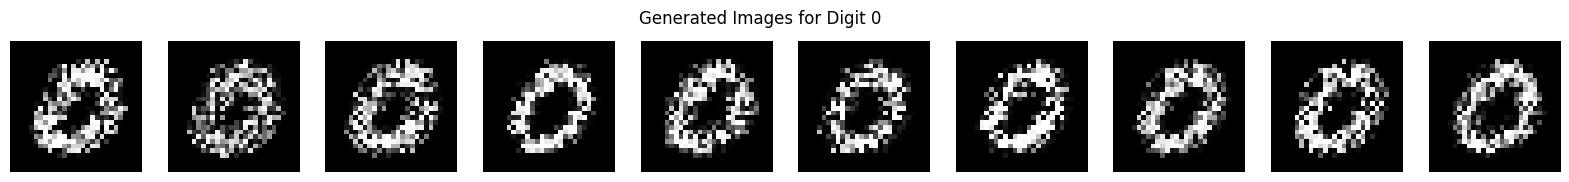

Epoch 2, MMD Loss: 0.03652083873748779


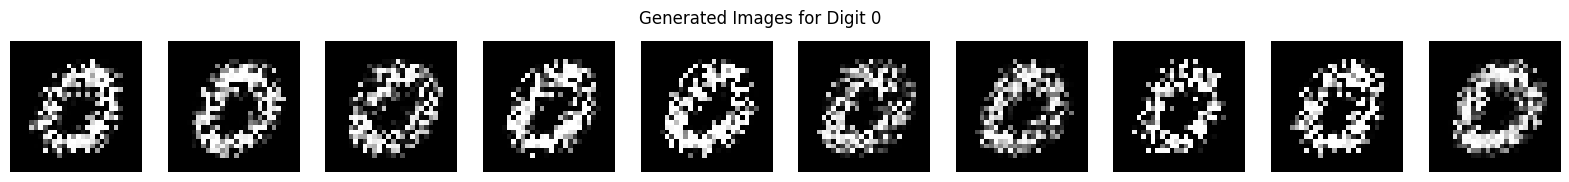

Epoch 3, MMD Loss: 0.02673804759979248


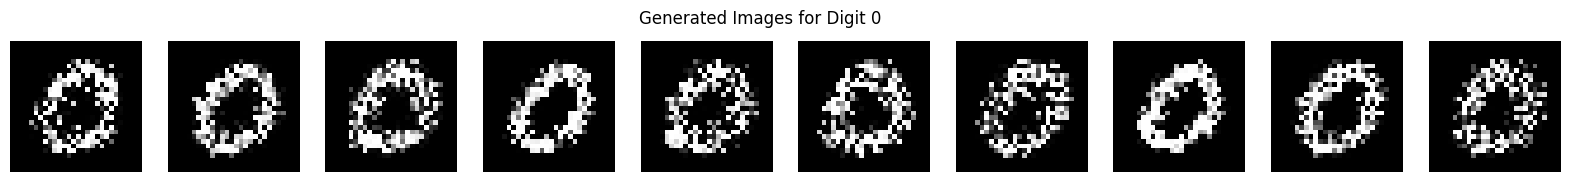

Epoch 4, MMD Loss: 0.0250091552734375


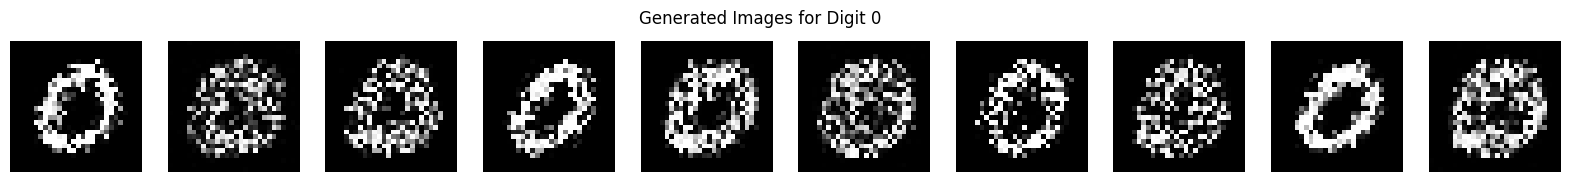

Epoch 5, MMD Loss: 0.02784097194671631


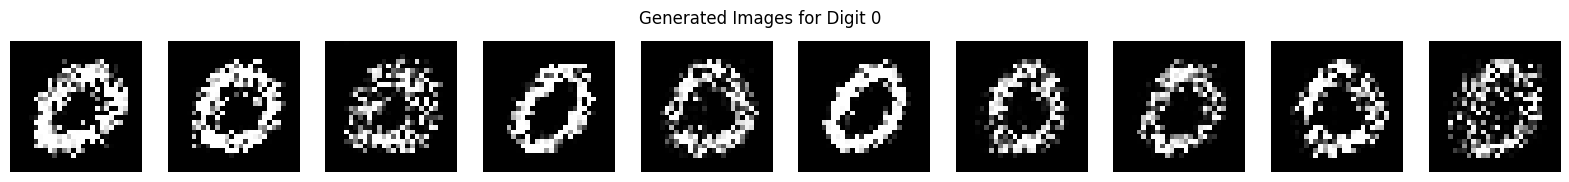

Epoch 6, MMD Loss: 0.025179266929626465


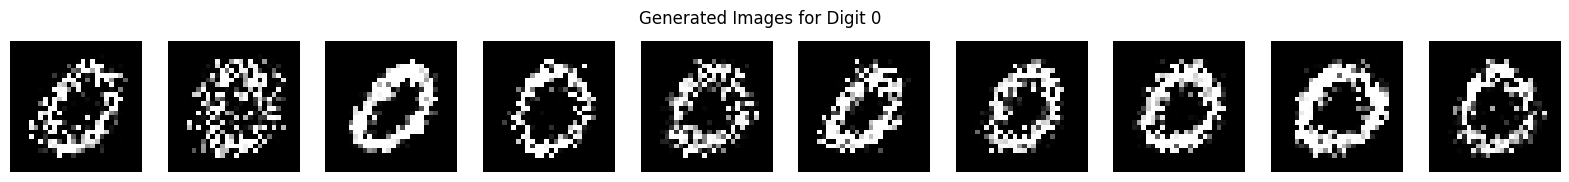

Epoch 7, MMD Loss: 0.022621512413024902


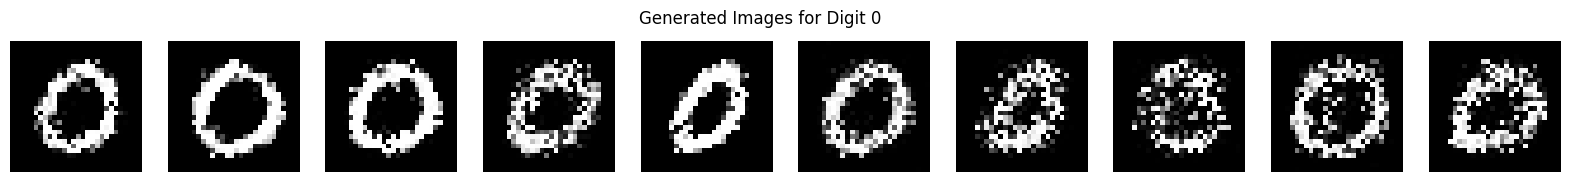

Epoch 8, MMD Loss: 0.02179586887359619


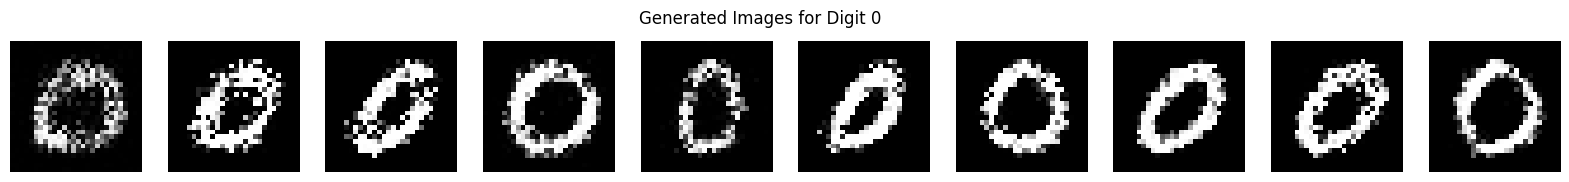

Epoch 9, MMD Loss: 0.01861405372619629


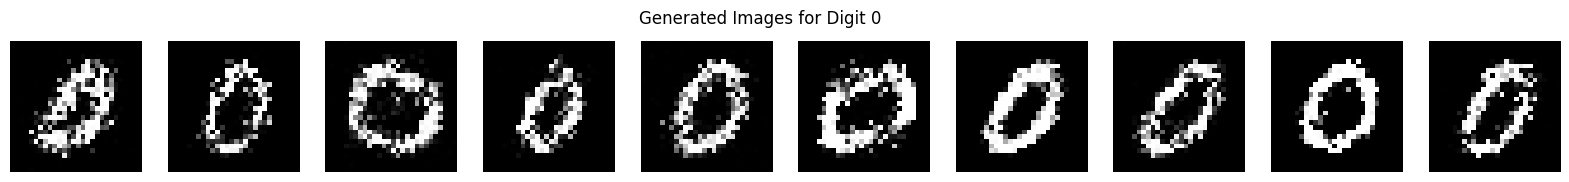

Epoch 10, MMD Loss: 0.02488410472869873


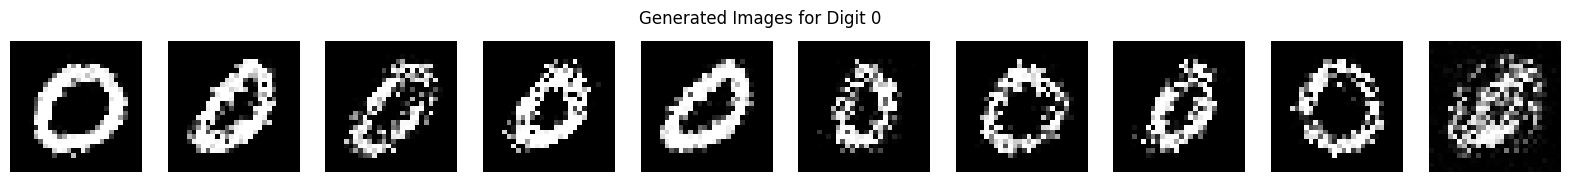

Training model for digit 1
Epoch 1, MMD Loss: 0.04201769828796387


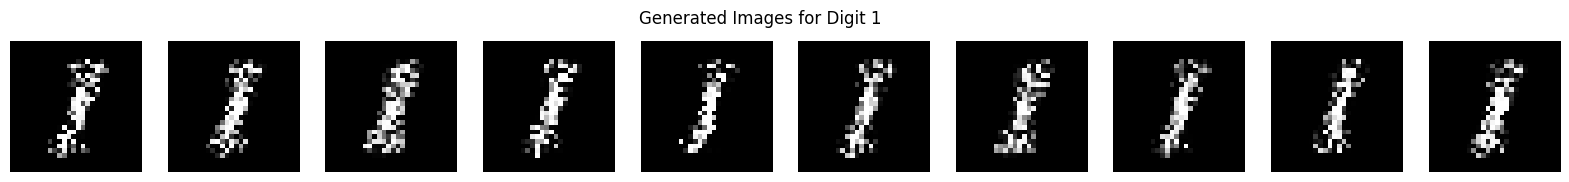

Epoch 2, MMD Loss: 0.033002376556396484


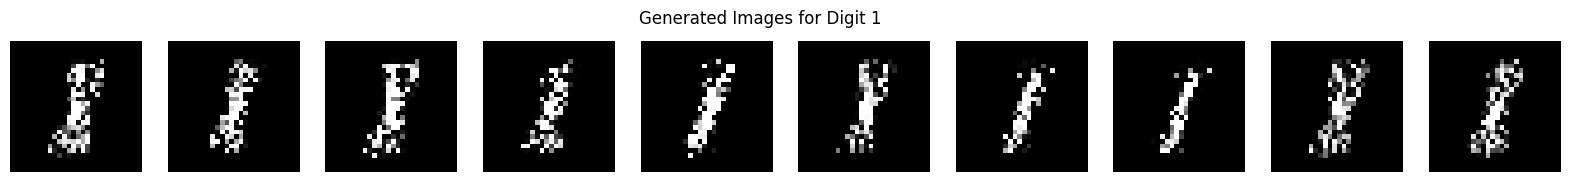

Epoch 3, MMD Loss: 0.030716538429260254


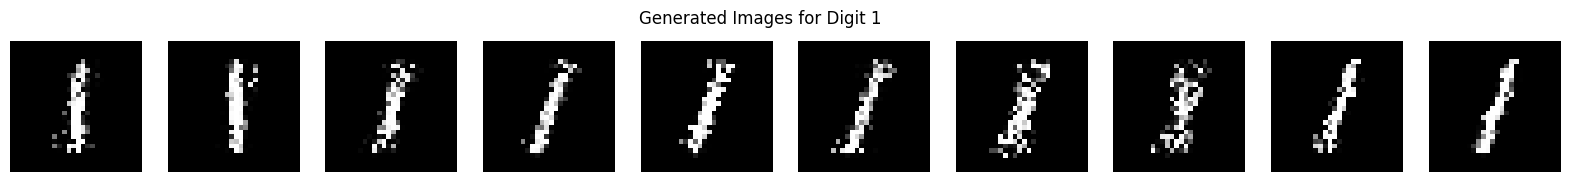

Epoch 4, MMD Loss: 0.02874934673309326


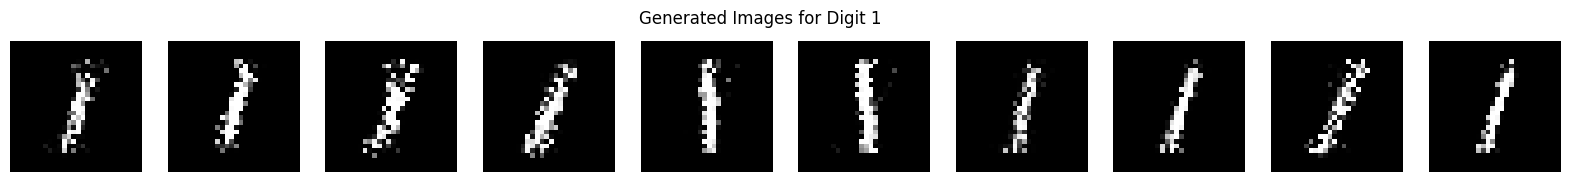

Epoch 5, MMD Loss: 0.042514920234680176


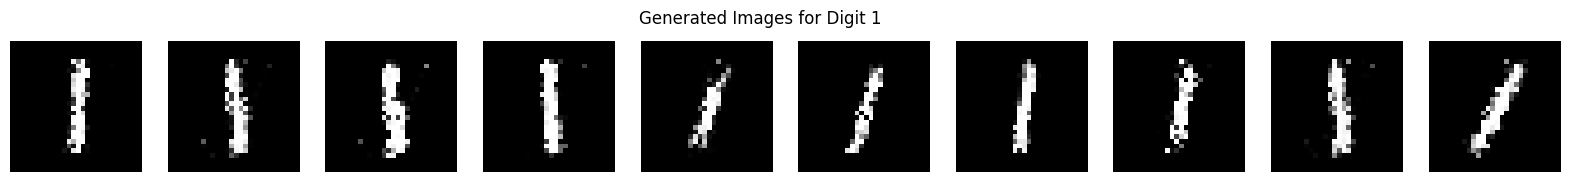

Epoch 6, MMD Loss: 0.030411243438720703


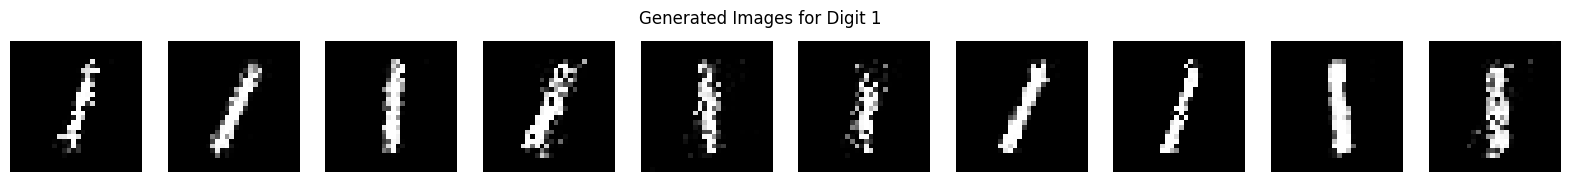

Epoch 7, MMD Loss: 0.021265864372253418


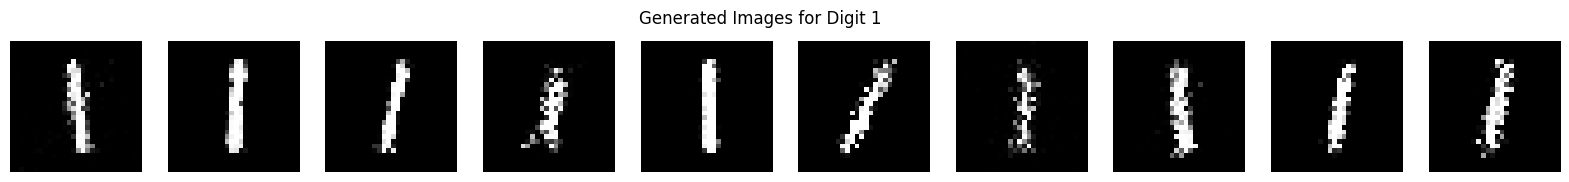

Epoch 8, MMD Loss: 0.02300393581390381


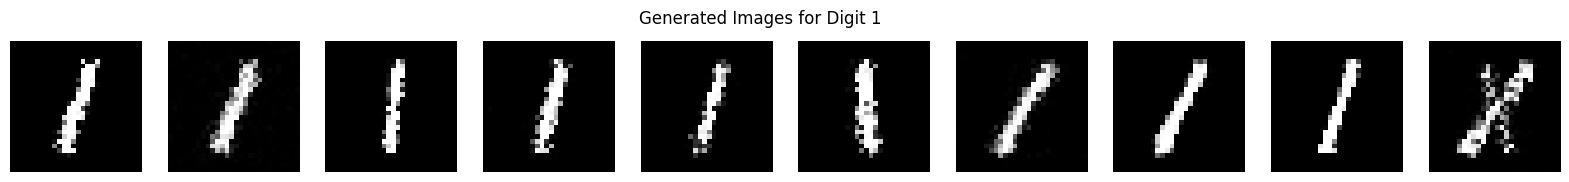

Epoch 9, MMD Loss: 0.027375459671020508


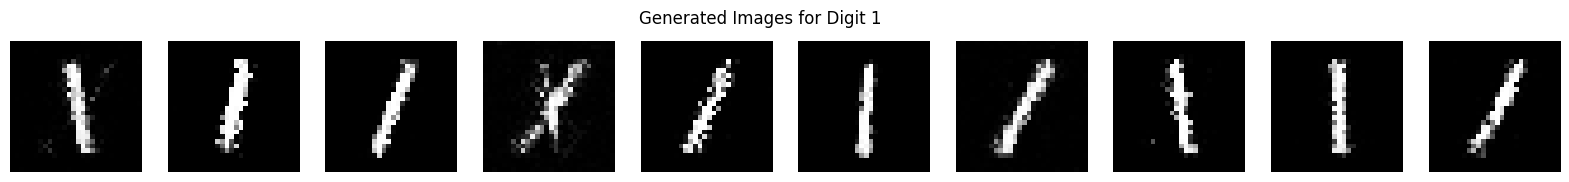

Epoch 10, MMD Loss: 0.02496469020843506


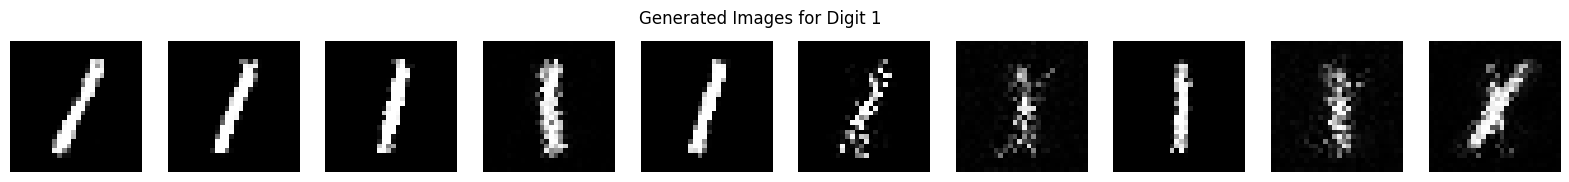

Training model for digit 2
Epoch 1, MMD Loss: 0.051224470138549805


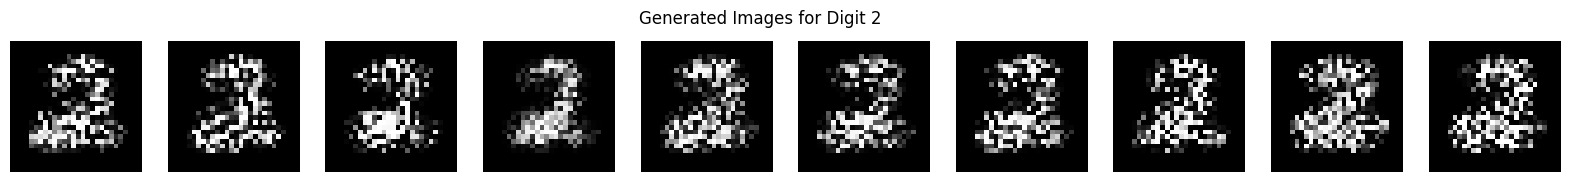

Epoch 2, MMD Loss: 0.05277585983276367


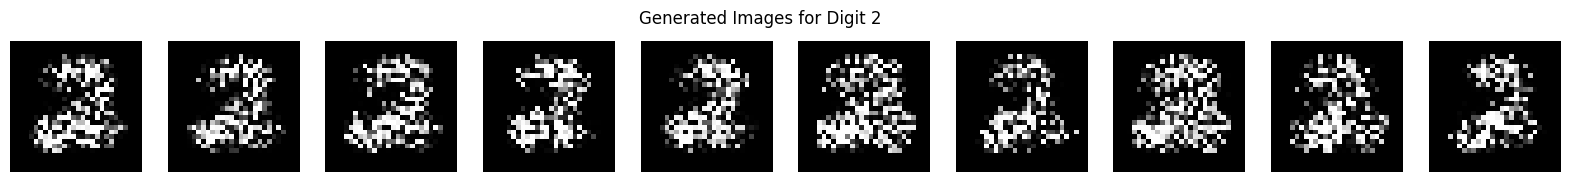

Epoch 3, MMD Loss: 0.04776585102081299


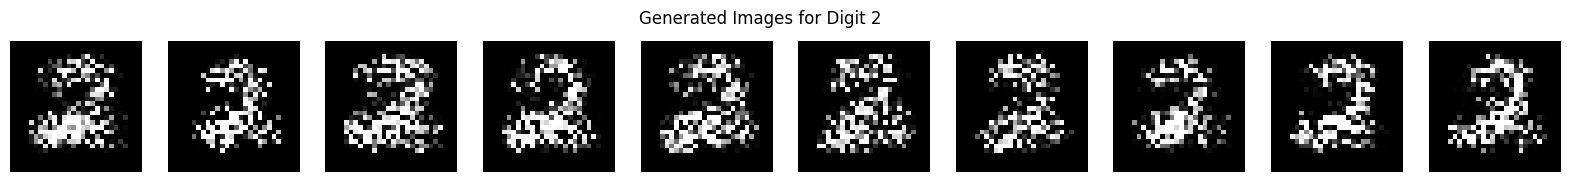

Epoch 4, MMD Loss: 0.04687035083770752


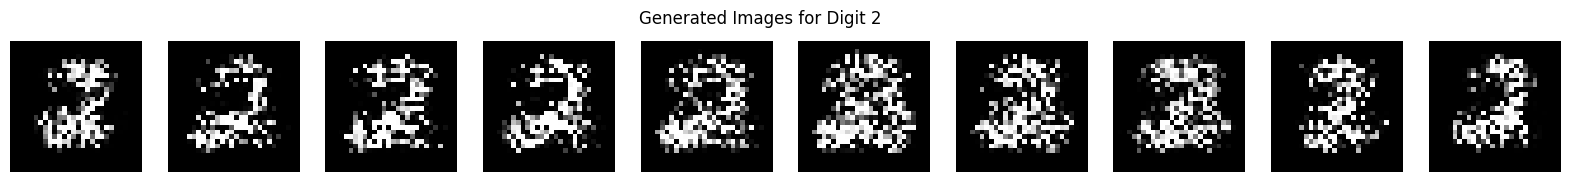

Epoch 5, MMD Loss: 0.05241191387176514


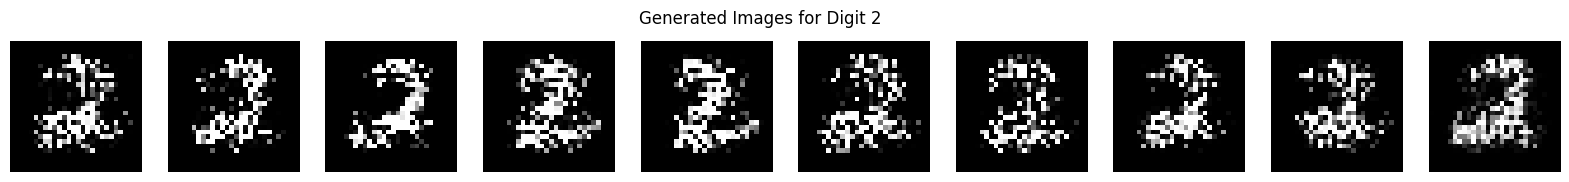

Epoch 6, MMD Loss: 0.04630911350250244


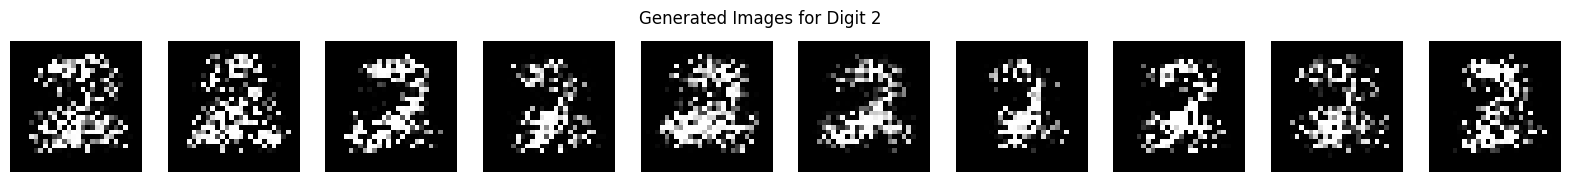

Epoch 7, MMD Loss: 0.04773879051208496


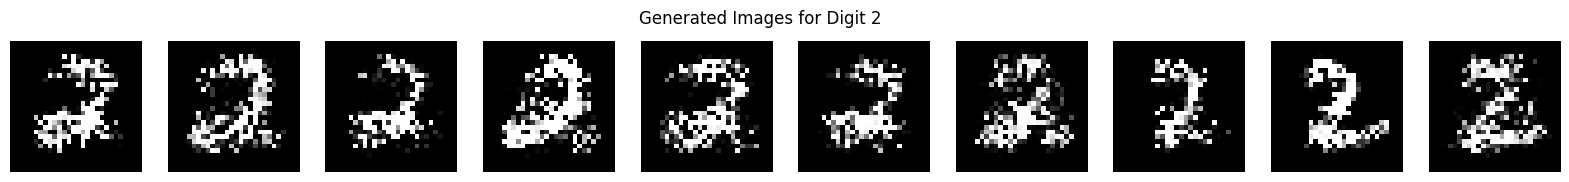

Epoch 8, MMD Loss: 0.0549318790435791


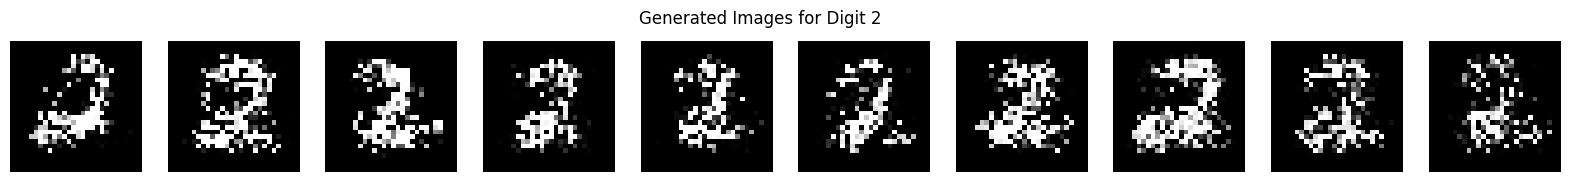

Epoch 9, MMD Loss: 0.044850707054138184


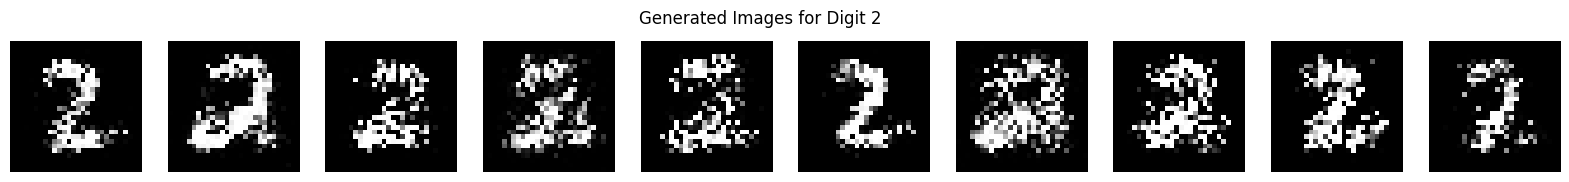

Epoch 10, MMD Loss: 0.04505658149719238


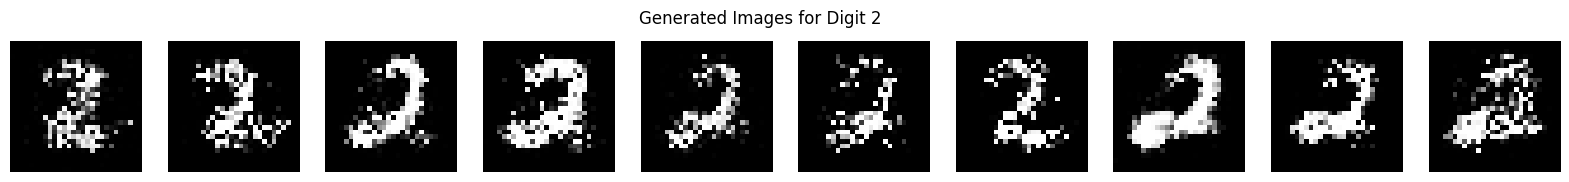

Training model for digit 3
Epoch 1, MMD Loss: 0.07229244709014893


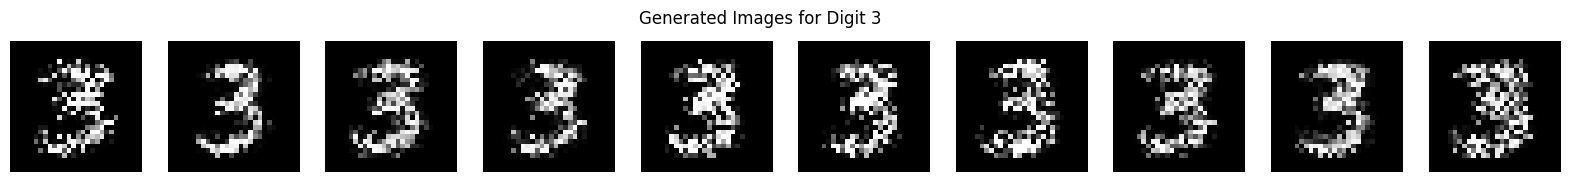

Epoch 2, MMD Loss: 0.06881976127624512


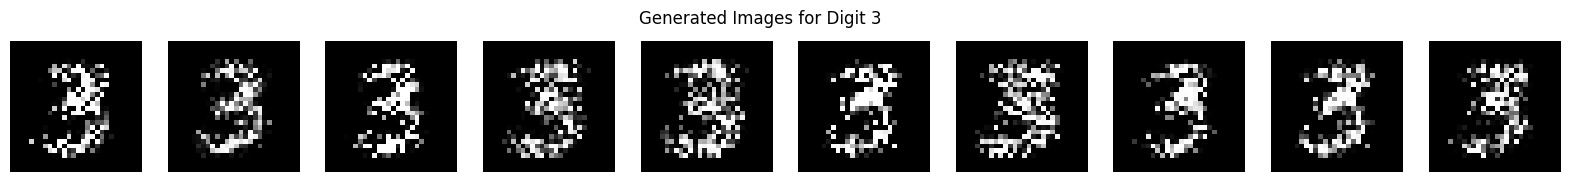

Epoch 3, MMD Loss: 0.07456910610198975


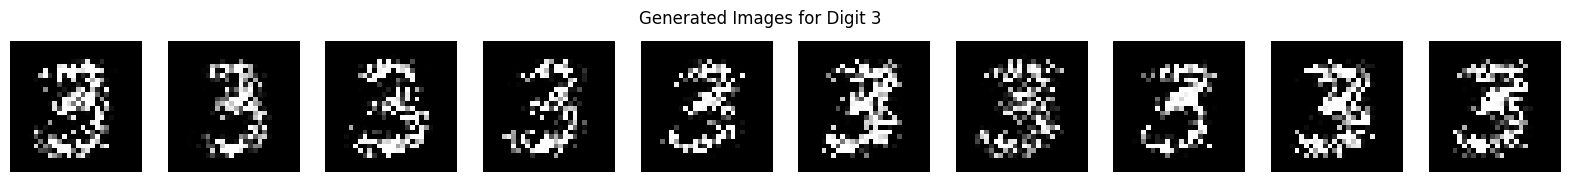

Epoch 4, MMD Loss: 0.07766509056091309


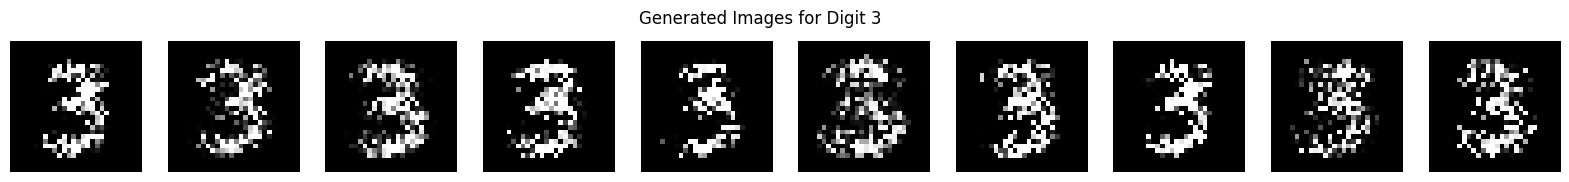

Epoch 5, MMD Loss: 0.07191145420074463


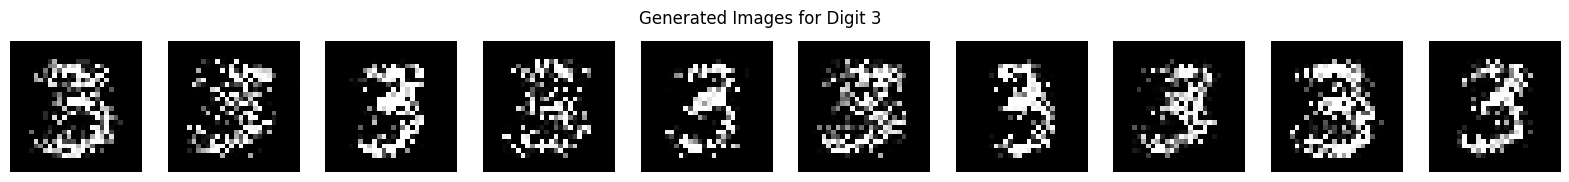

Epoch 6, MMD Loss: 0.06904792785644531


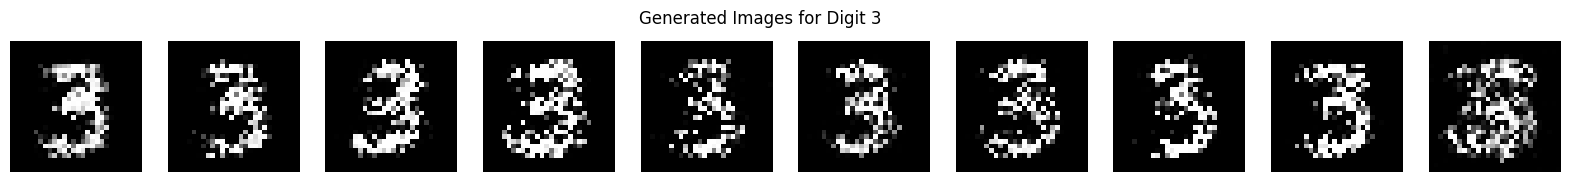

Epoch 7, MMD Loss: 0.06967449188232422


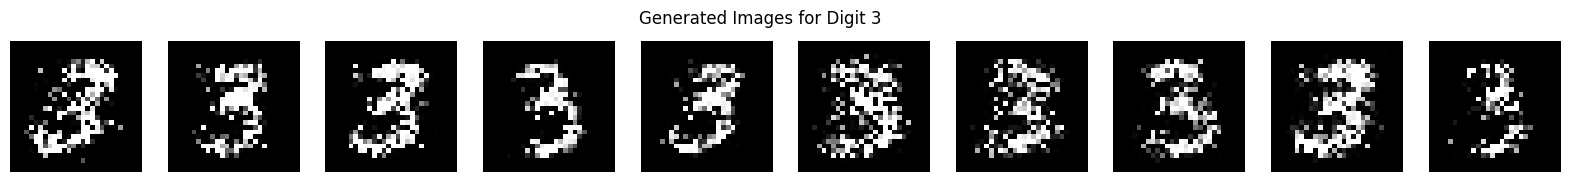

Epoch 8, MMD Loss: 0.06881439685821533


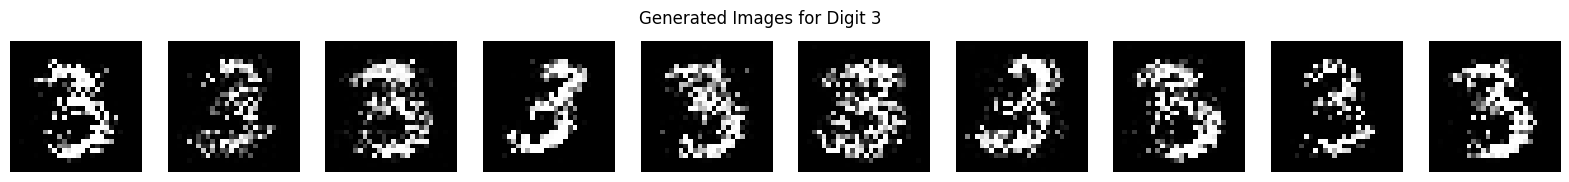

Epoch 9, MMD Loss: 0.07218062877655029


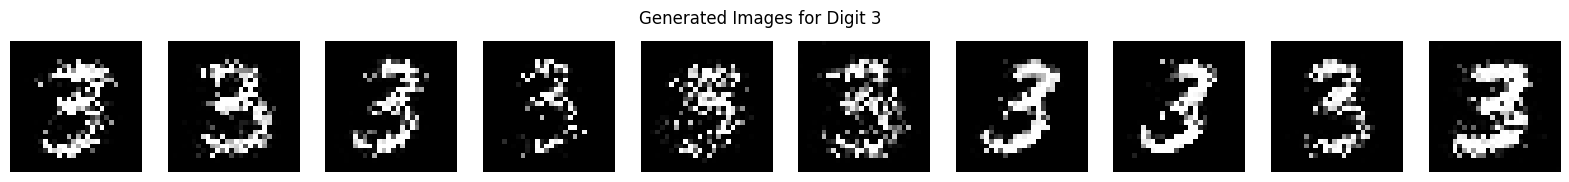

Epoch 10, MMD Loss: 0.0692911148071289


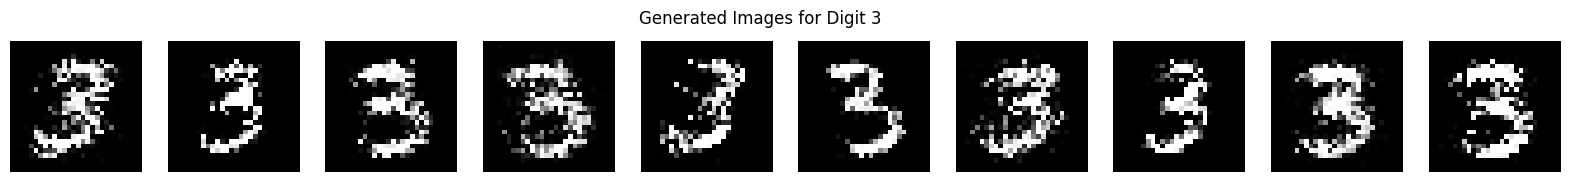

Training model for digit 4
Epoch 1, MMD Loss: 0.04781770706176758


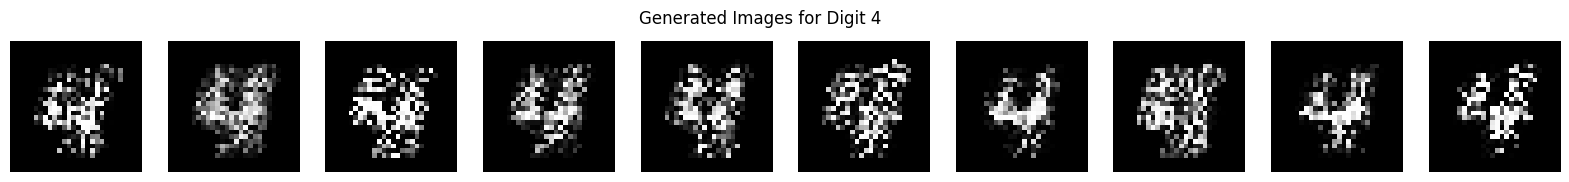

Epoch 2, MMD Loss: 0.03854990005493164


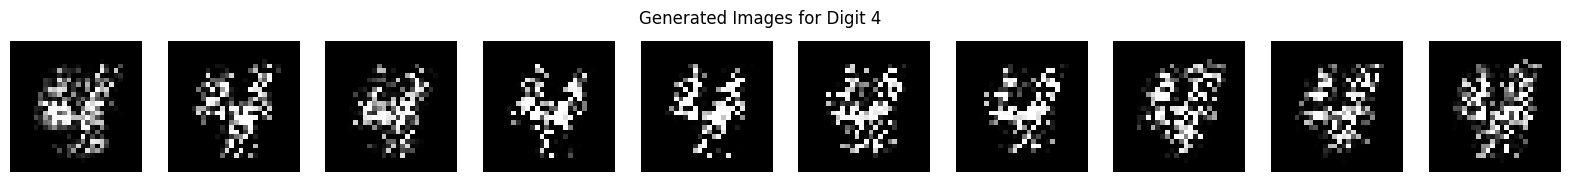

Epoch 3, MMD Loss: 0.044135332107543945


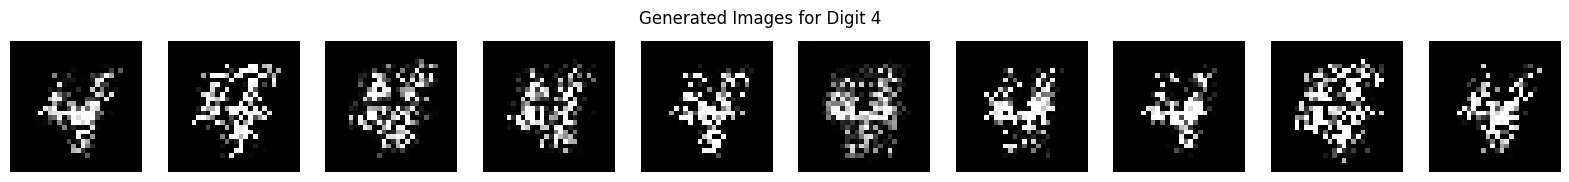

Epoch 4, MMD Loss: 0.04086101055145264


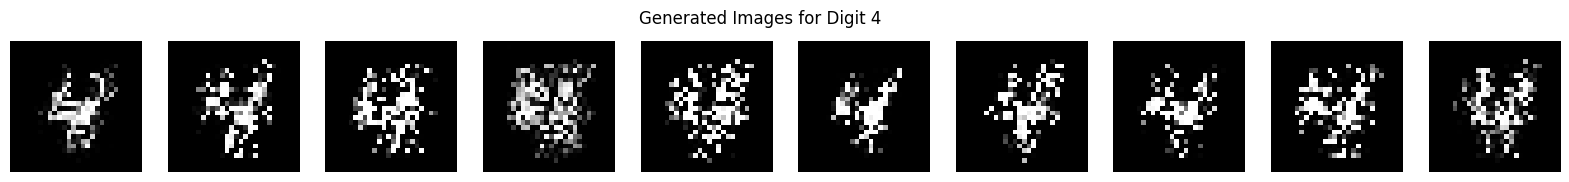

Epoch 5, MMD Loss: 0.04552125930786133


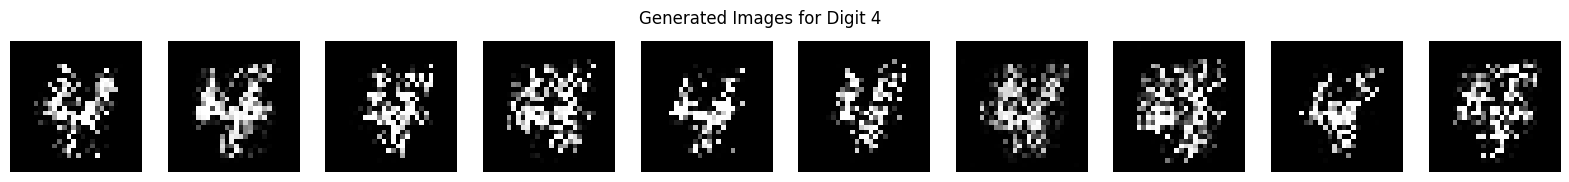

Epoch 6, MMD Loss: 0.03986549377441406


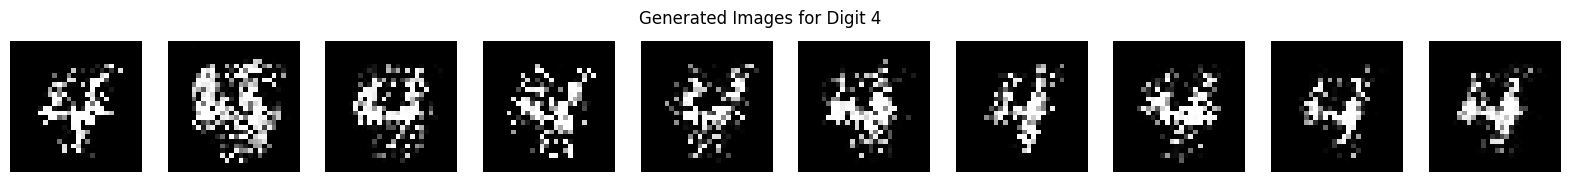

Epoch 7, MMD Loss: 0.04129183292388916


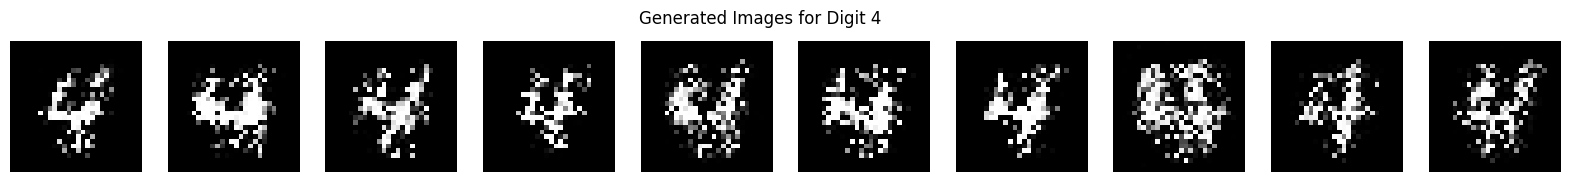

Epoch 8, MMD Loss: 0.04165053367614746


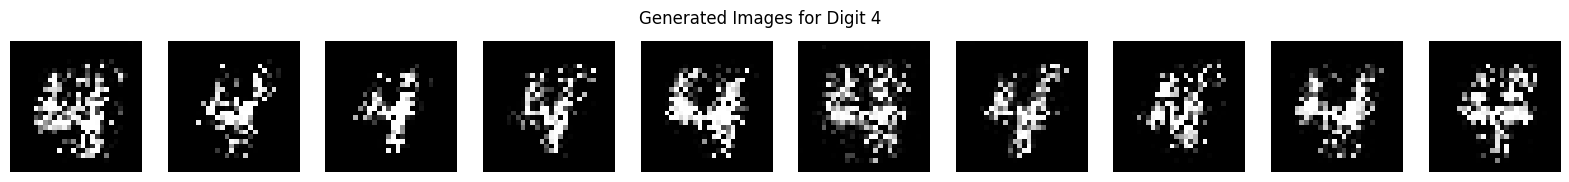

Epoch 9, MMD Loss: 0.03629612922668457


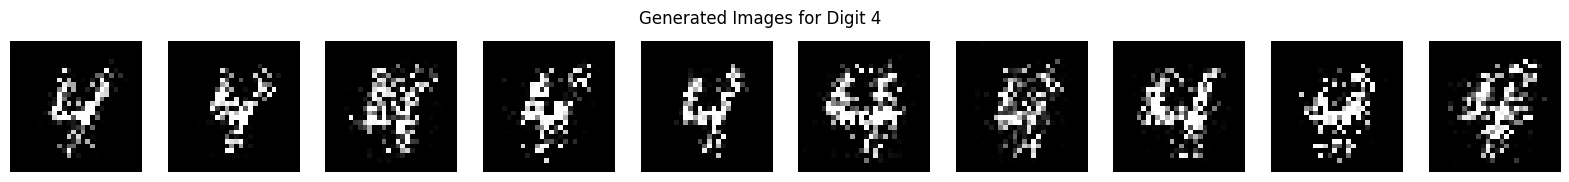

Epoch 10, MMD Loss: 0.0353313684463501


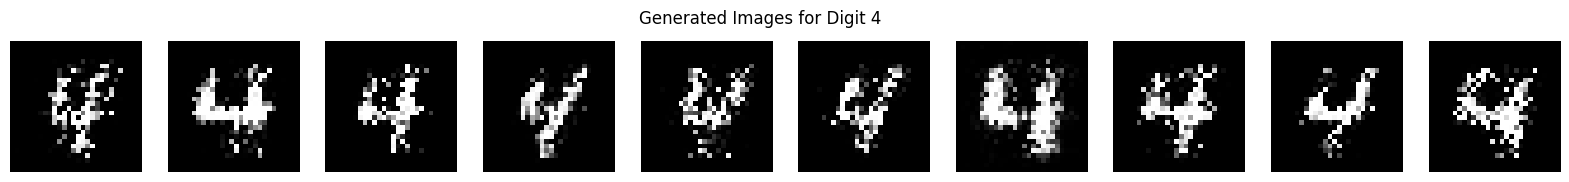

Training model for digit 5
Epoch 1, MMD Loss: 0.056603074073791504


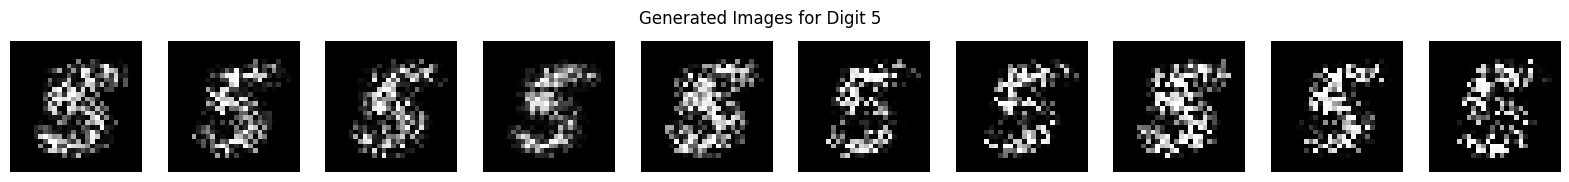

Epoch 2, MMD Loss: 0.04651379585266113


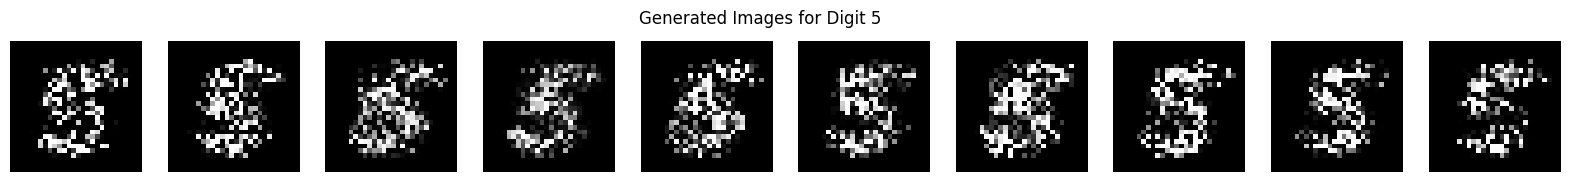

Epoch 3, MMD Loss: 0.04605066776275635


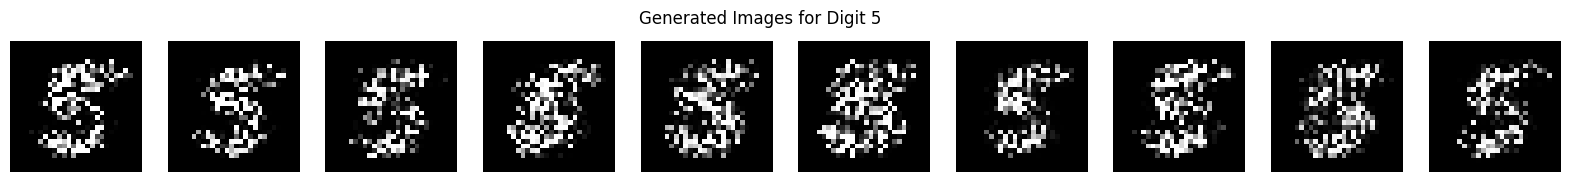

Epoch 4, MMD Loss: 0.0460890531539917


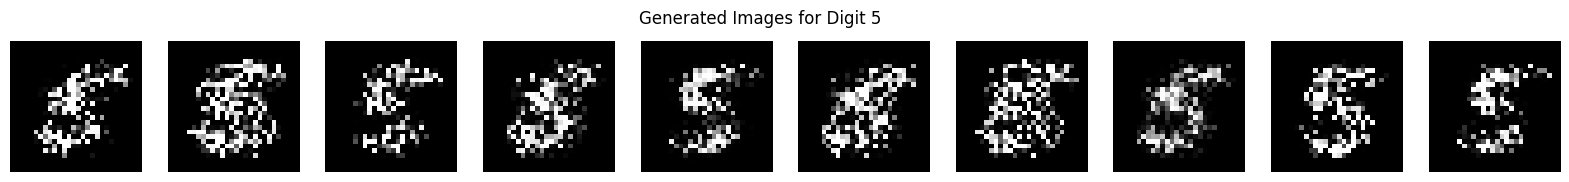

Epoch 5, MMD Loss: 0.046589016914367676


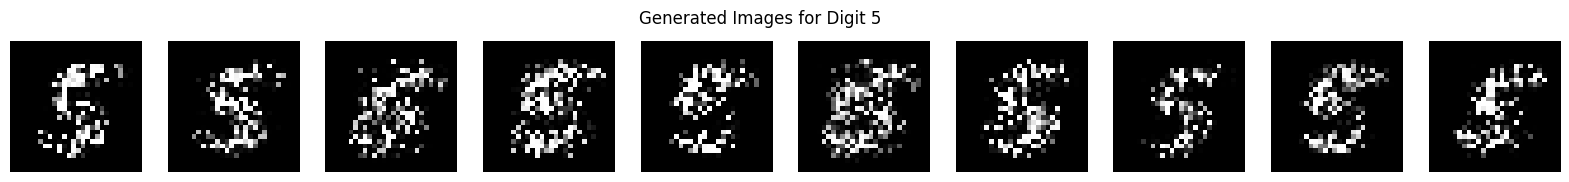

Epoch 6, MMD Loss: 0.03889954090118408


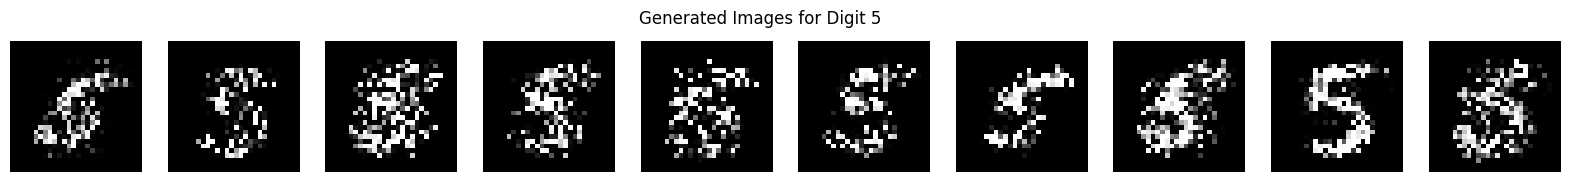

Epoch 7, MMD Loss: 0.0393446683883667


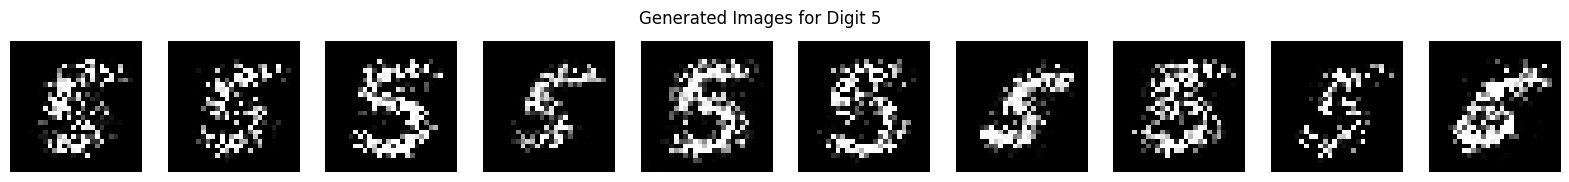

Epoch 8, MMD Loss: 0.03730940818786621


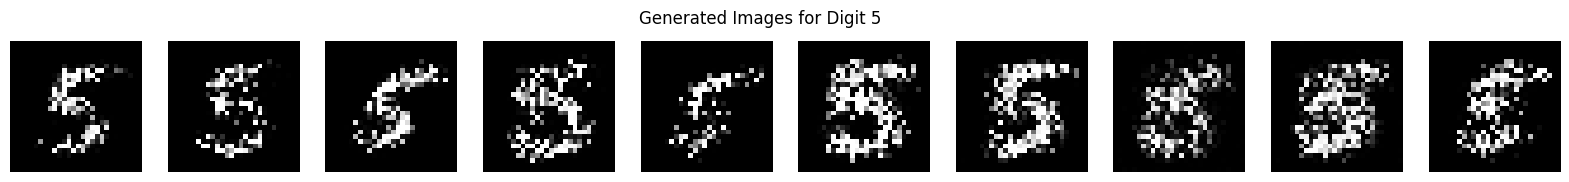

Epoch 9, MMD Loss: 0.042984962463378906


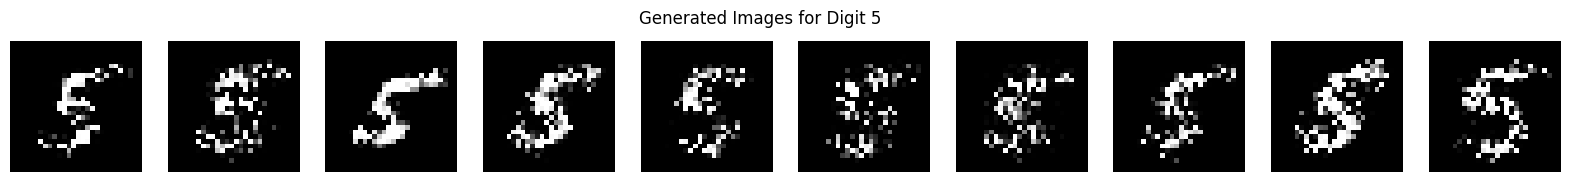

Epoch 10, MMD Loss: 0.04036736488342285


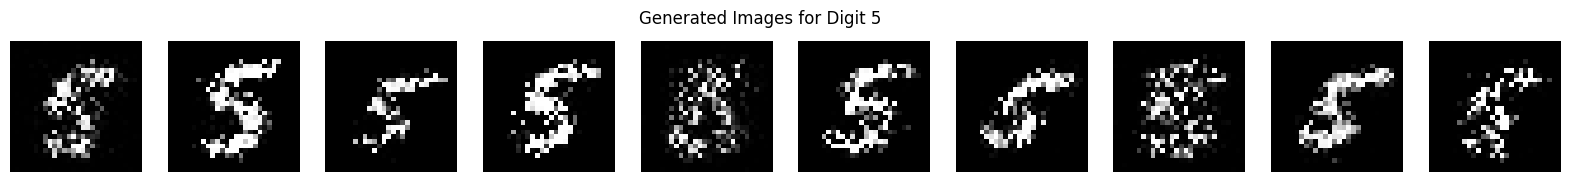

Training model for digit 6
Epoch 1, MMD Loss: 0.03194296360015869


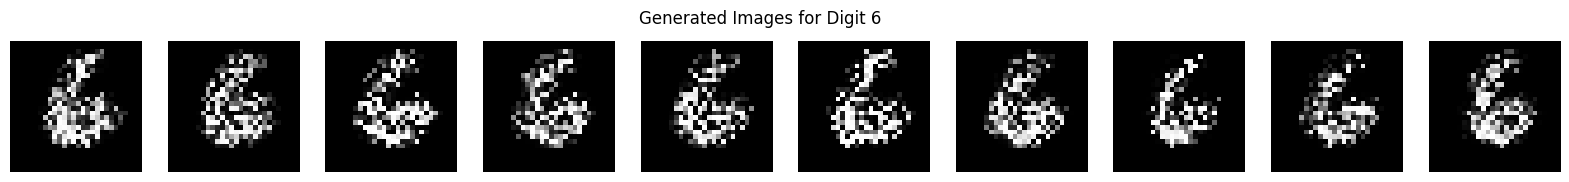

Epoch 2, MMD Loss: 0.028357744216918945


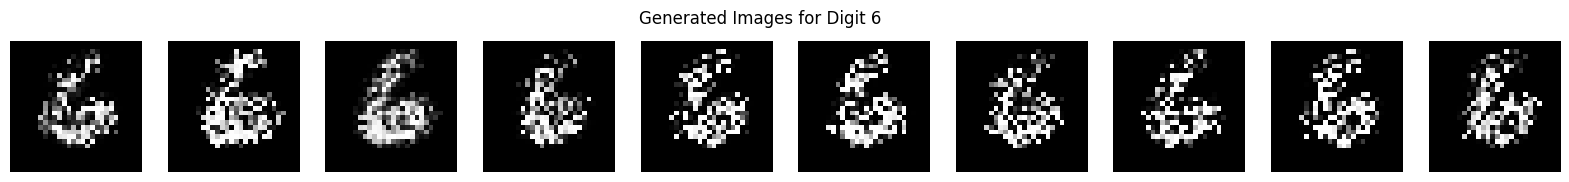

Epoch 3, MMD Loss: 0.03348696231842041


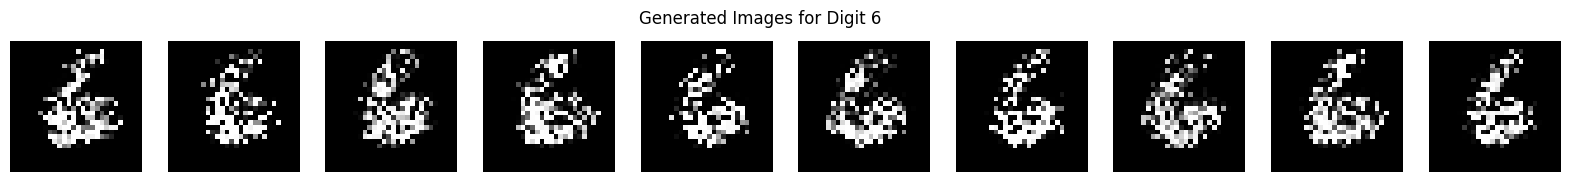

Epoch 4, MMD Loss: 0.027396321296691895


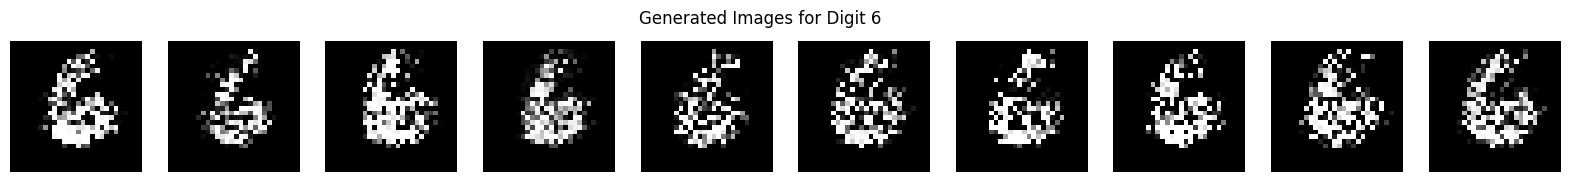

Epoch 5, MMD Loss: 0.027381300926208496


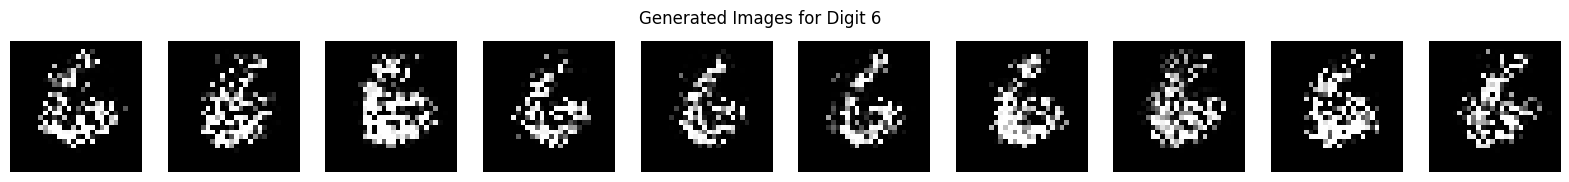

Epoch 6, MMD Loss: 0.029677629470825195


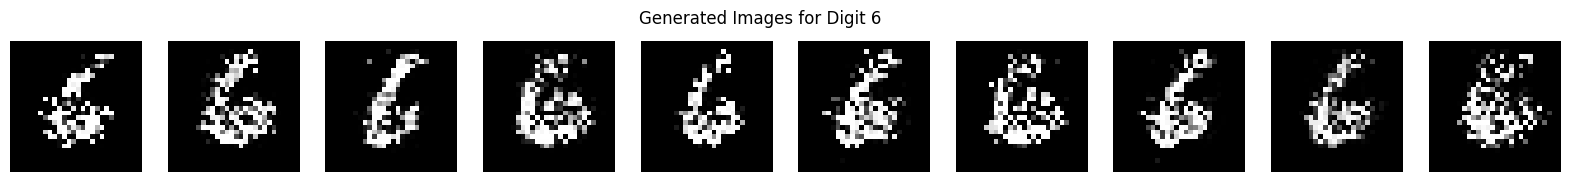

Epoch 7, MMD Loss: 0.026163220405578613


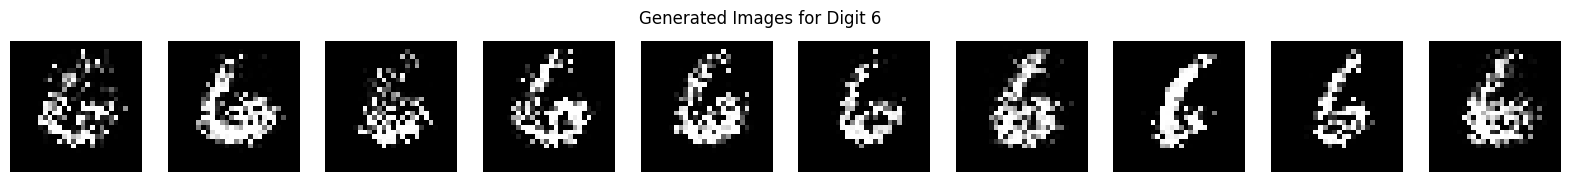

Epoch 8, MMD Loss: 0.021689772605895996


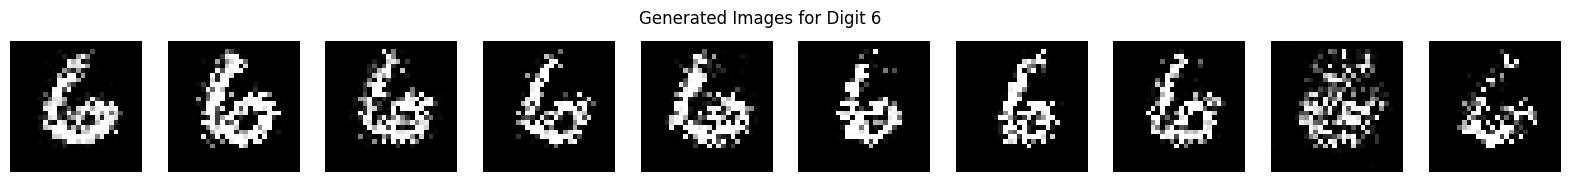

Epoch 9, MMD Loss: 0.02445995807647705


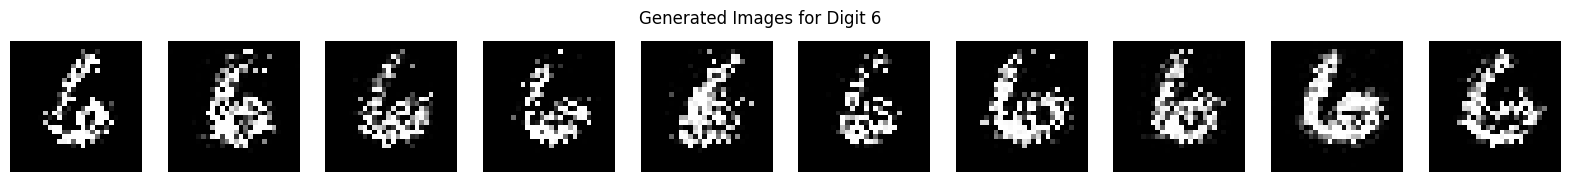

Epoch 10, MMD Loss: 0.024989843368530273


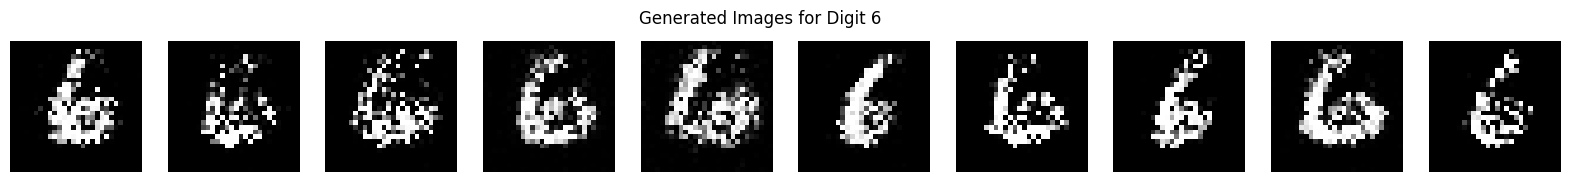

Training model for digit 7
Epoch 1, MMD Loss: 0.03853106498718262


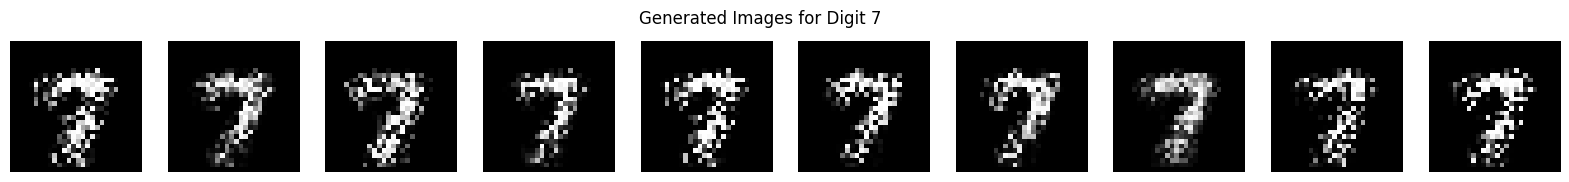

Epoch 2, MMD Loss: 0.03722214698791504


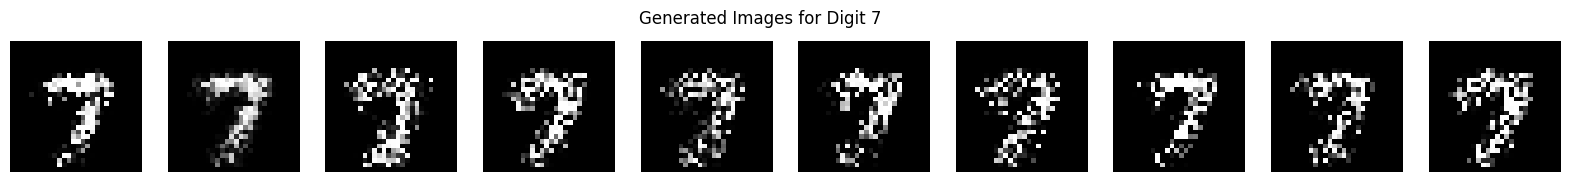

Epoch 3, MMD Loss: 0.033043503761291504


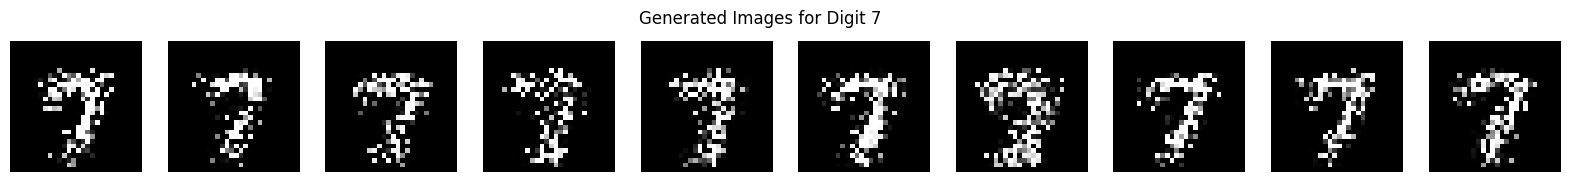

Epoch 4, MMD Loss: 0.03611886501312256


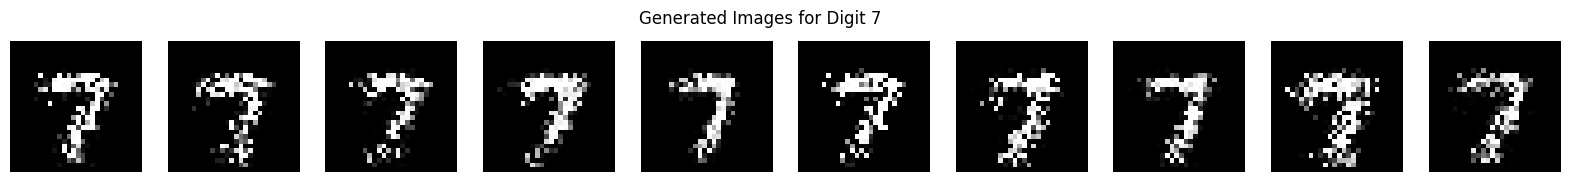

Epoch 5, MMD Loss: 0.03273582458496094


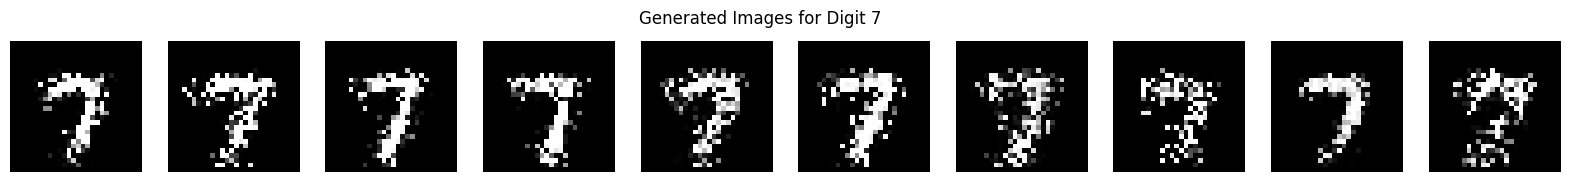

Epoch 6, MMD Loss: 0.03597831726074219


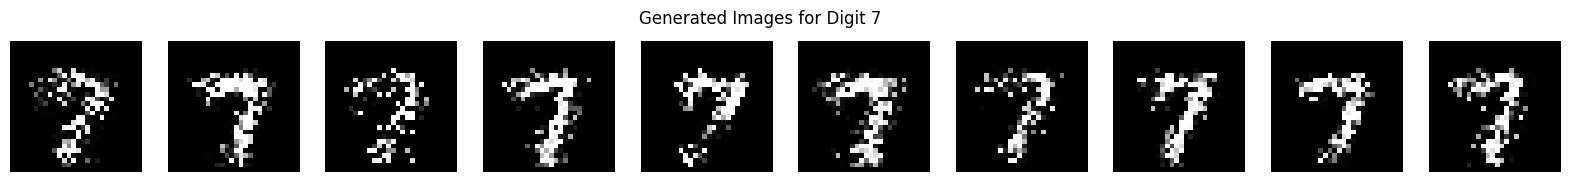

Epoch 7, MMD Loss: 0.03139662742614746


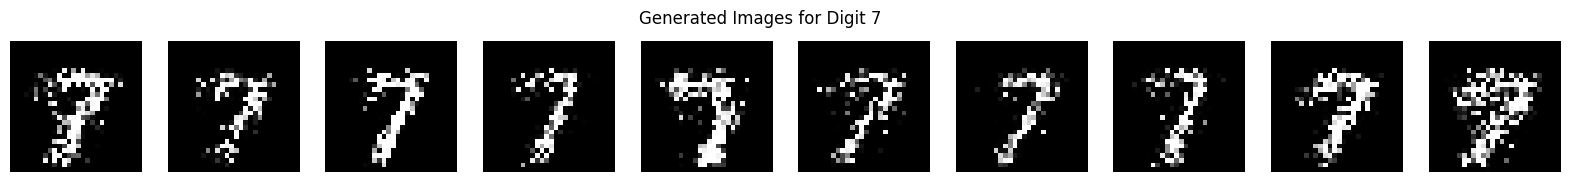

Epoch 8, MMD Loss: 0.03698527812957764


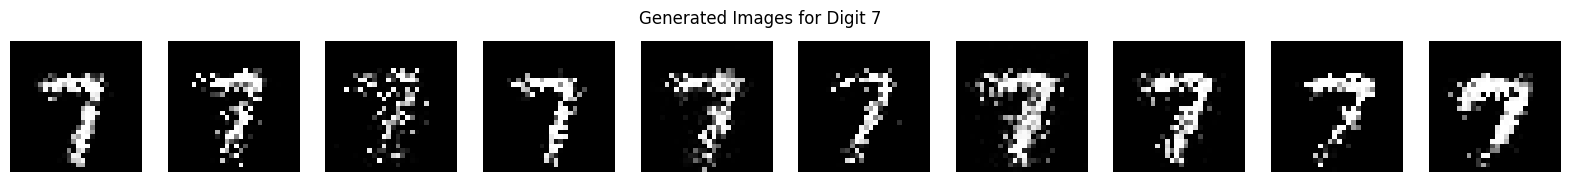

Epoch 9, MMD Loss: 0.028099536895751953


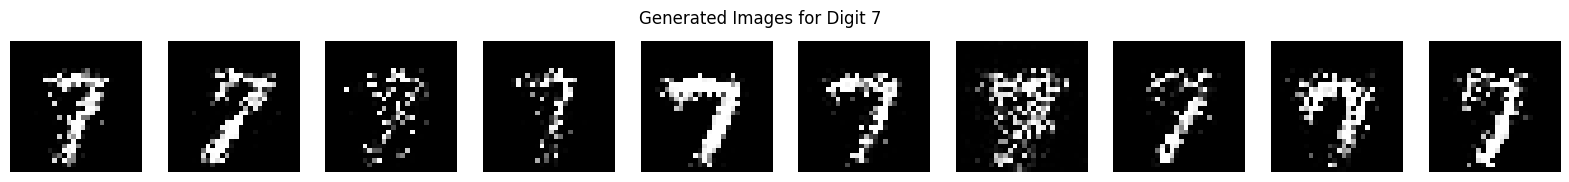

Epoch 10, MMD Loss: 0.03384530544281006


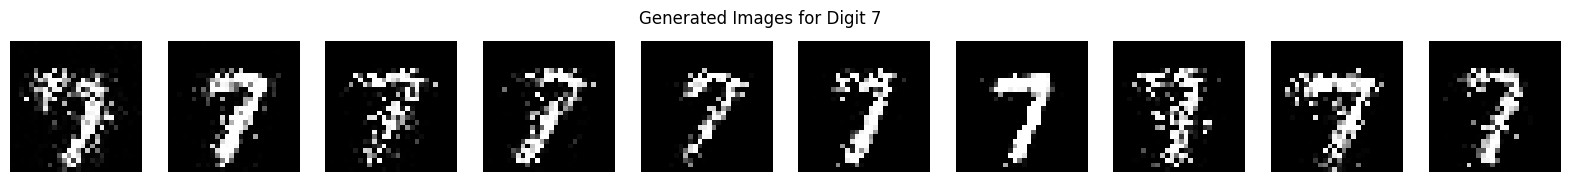

Training model for digit 8
Epoch 1, MMD Loss: 0.0338139533996582


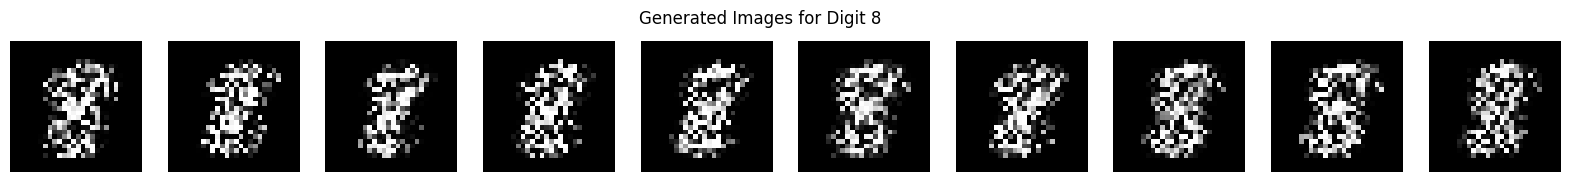

Epoch 2, MMD Loss: 0.034349799156188965


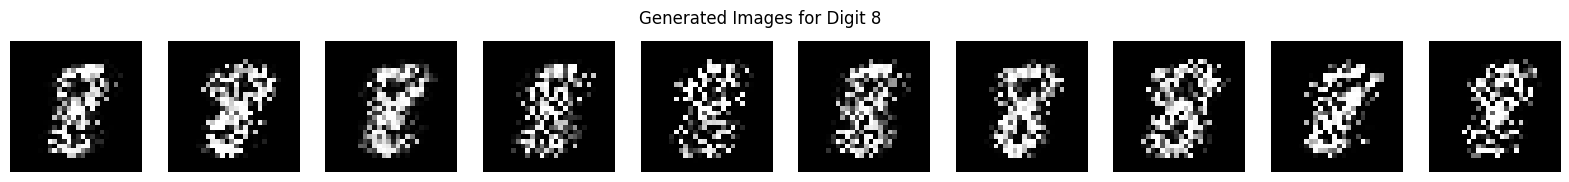

Epoch 3, MMD Loss: 0.03108382225036621


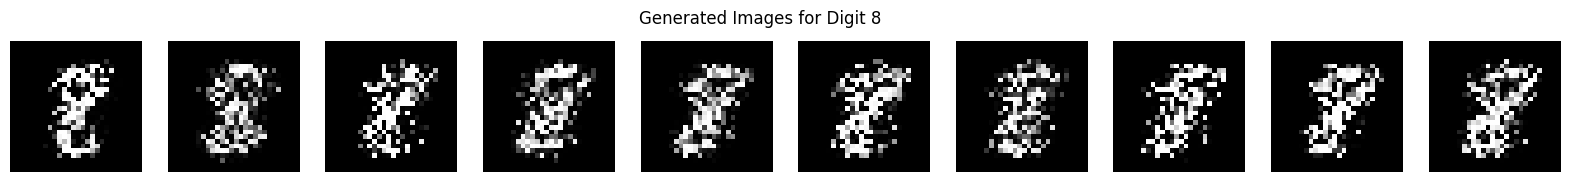

Epoch 4, MMD Loss: 0.034605979919433594


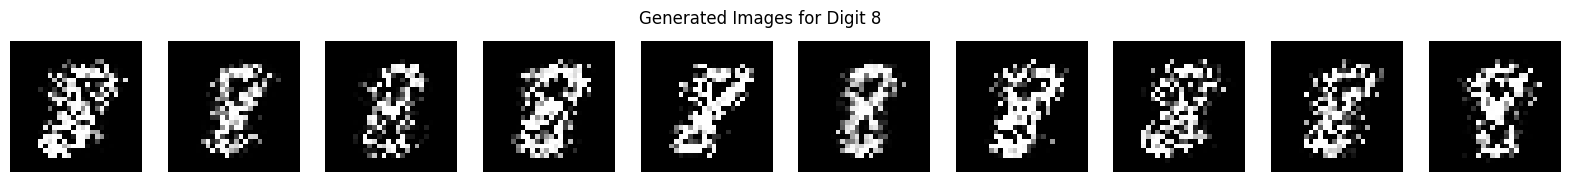

Epoch 5, MMD Loss: 0.03570079803466797


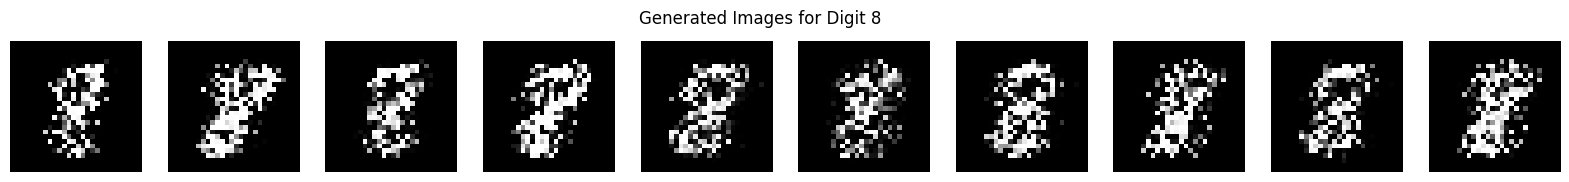

Epoch 6, MMD Loss: 0.03267371654510498


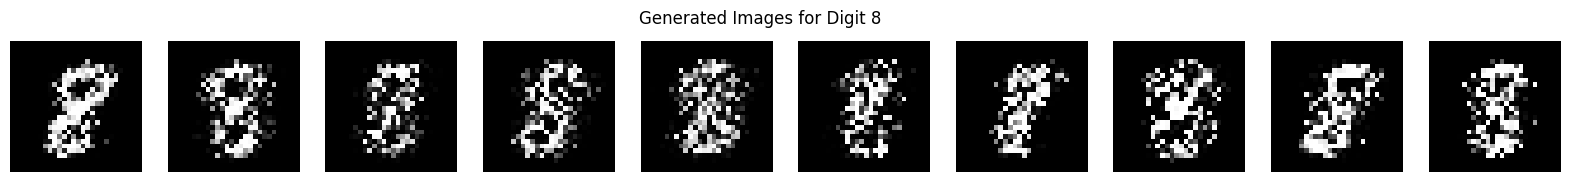

Epoch 7, MMD Loss: 0.03672194480895996


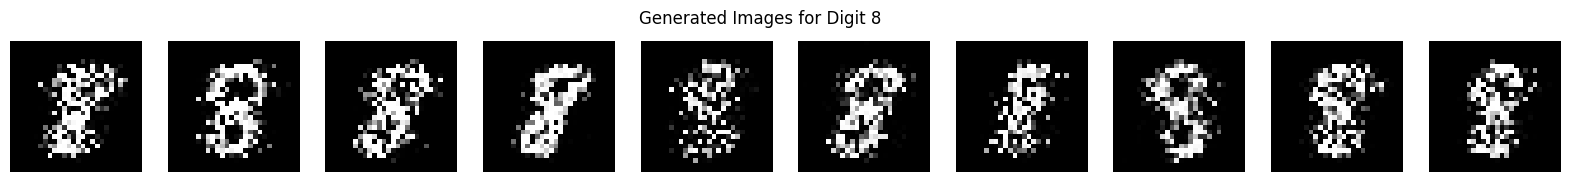

Epoch 8, MMD Loss: 0.03721940517425537


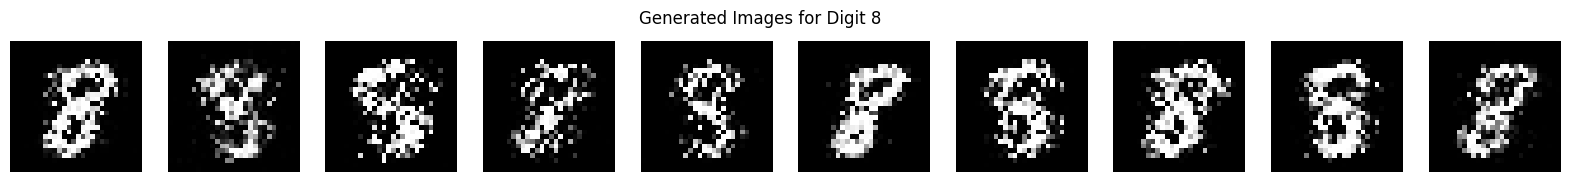

Epoch 9, MMD Loss: 0.0314253568649292


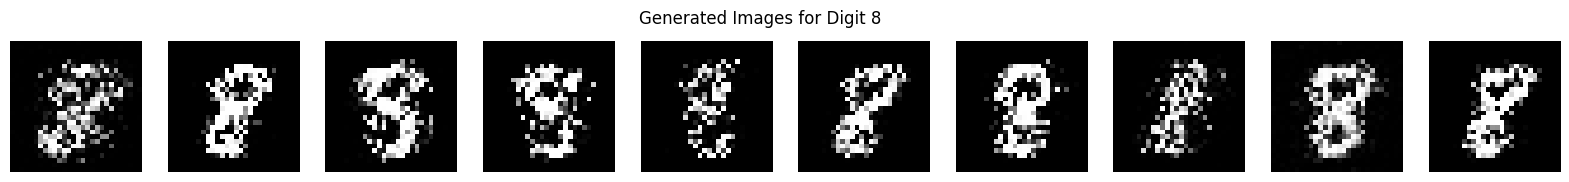

Epoch 10, MMD Loss: 0.03087592124938965


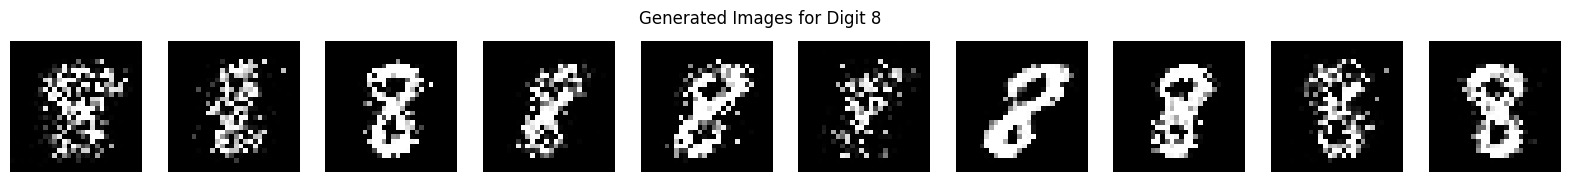

Training model for digit 9
Epoch 1, MMD Loss: 0.09788572788238525


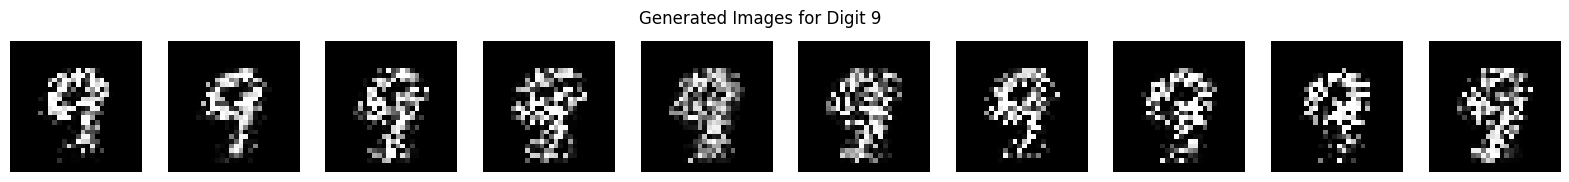

Epoch 2, MMD Loss: 0.08890461921691895


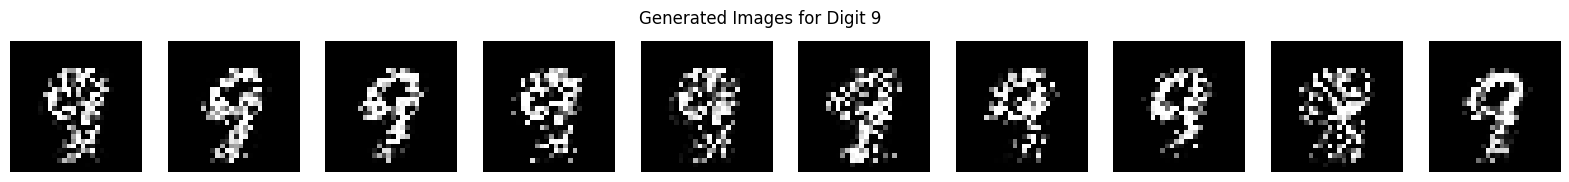

Epoch 3, MMD Loss: 0.0809333324432373


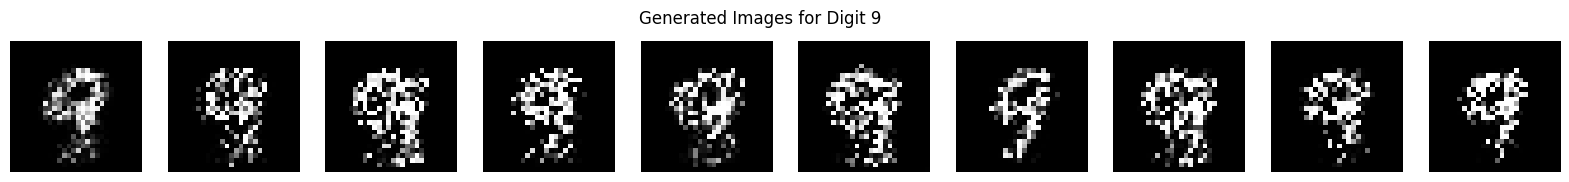

Epoch 4, MMD Loss: 0.08885157108306885


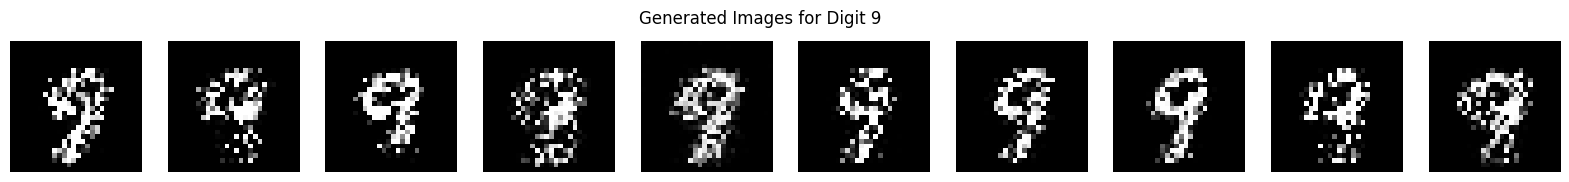

Epoch 5, MMD Loss: 0.08019518852233887


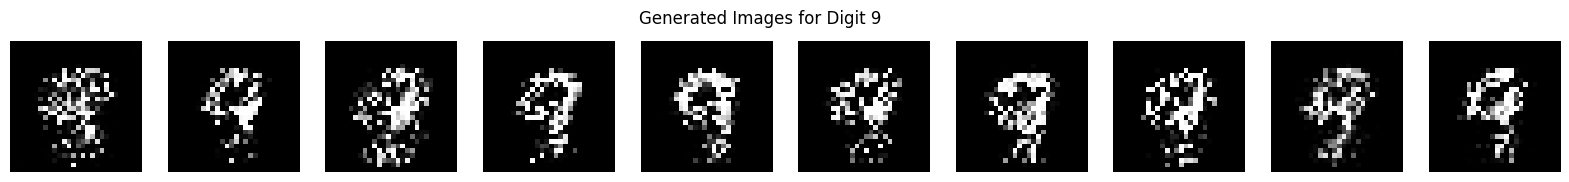

Epoch 6, MMD Loss: 0.09695422649383545


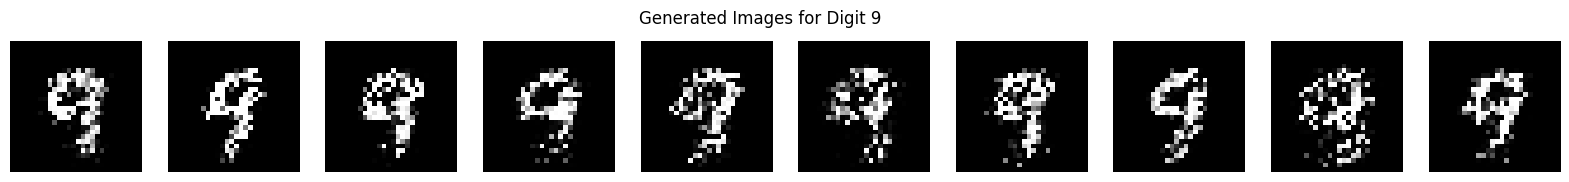

Epoch 7, MMD Loss: 0.08042621612548828


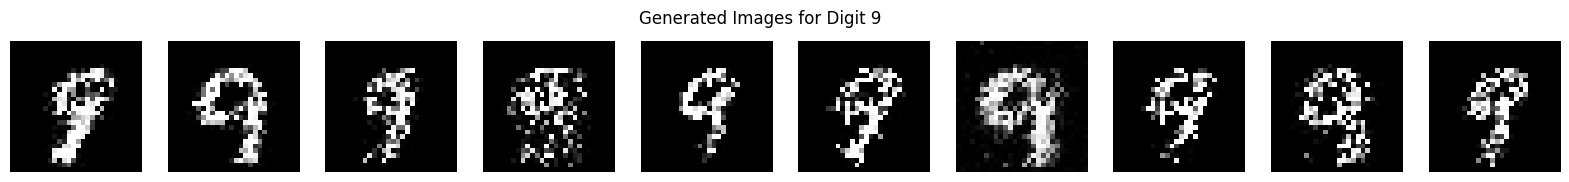

Epoch 8, MMD Loss: 0.07508540153503418


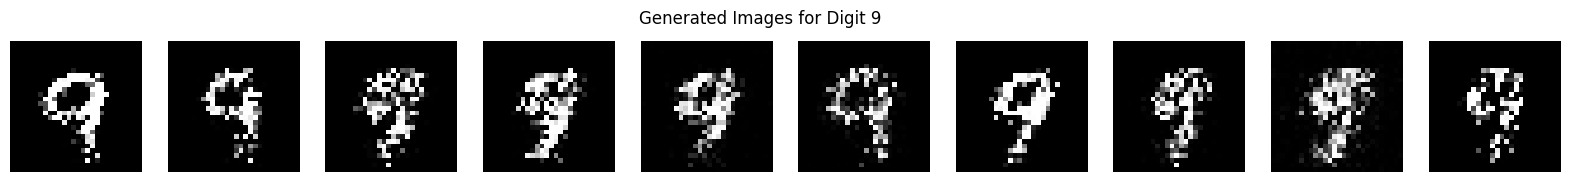

Epoch 9, MMD Loss: 0.07287955284118652


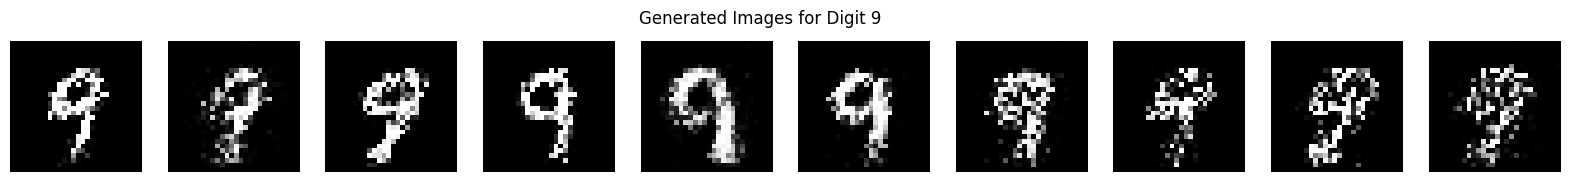

Epoch 10, MMD Loss: 0.08293700218200684


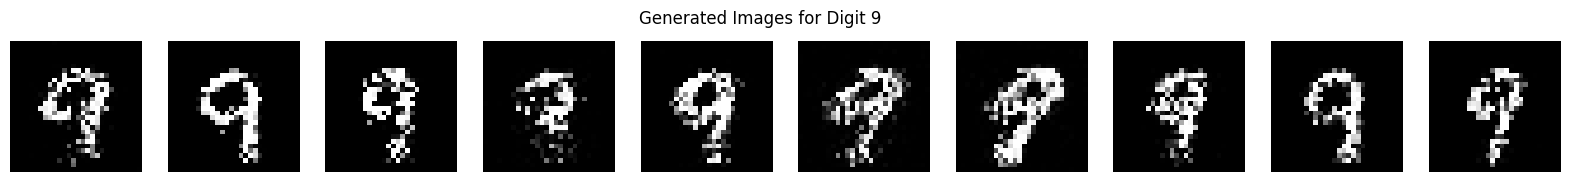

In [16]:
# Assume GMMN and compute_mmd are defined as before

def train_model_for_digit(digit_dataset, i):
    model = models[i]
    optimizer = tf.keras.optimizers.legacy.Adam()

    epochs = 10  # You might adjust this based on experimentation
    for epoch in range(epochs):
        for real_images in digit_dataset:
            with tf.GradientTape() as tape:
                noise = tf.random.normal([real_images.shape[0], 100])  # 100-dimensional noise vector
                generated_images = model(noise)
                mmd_loss = compute_mmd(real_images, generated_images)
            
            gradients = tape.gradient(mmd_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        print(f'Epoch {epoch+1}, MMD Loss: {mmd_loss.numpy()}')
        generate_images(model, digit=i)
    return model

for i, dataset in enumerate(datasets):
    print(f"Training model for digit {i}")
    model = train_model_for_digit(dataset, i)


In [17]:
# target_digit = 8
# models[target_digit].save_weights(f'gmmn_model_{target_digit}.h5')

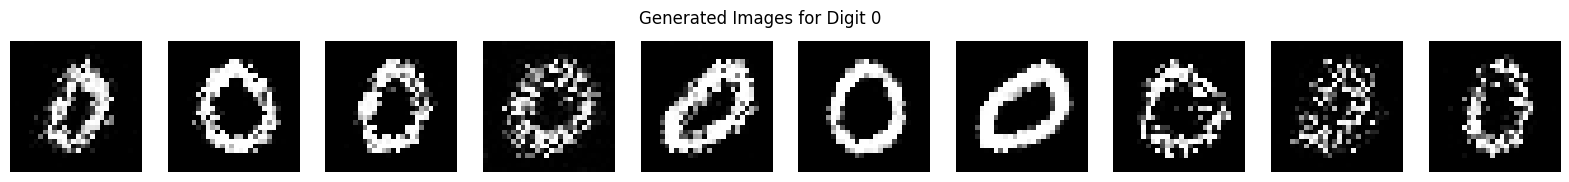

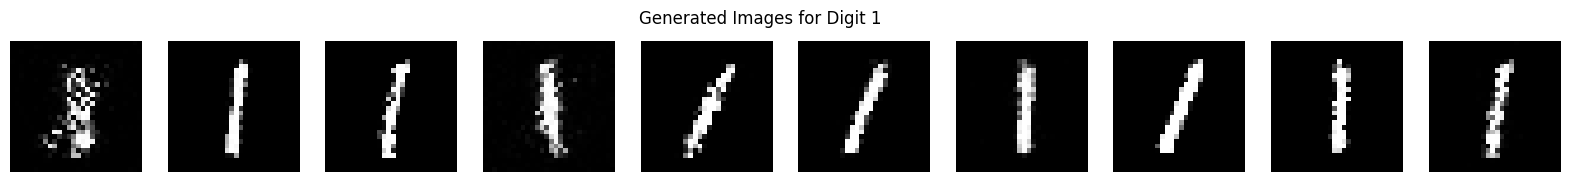

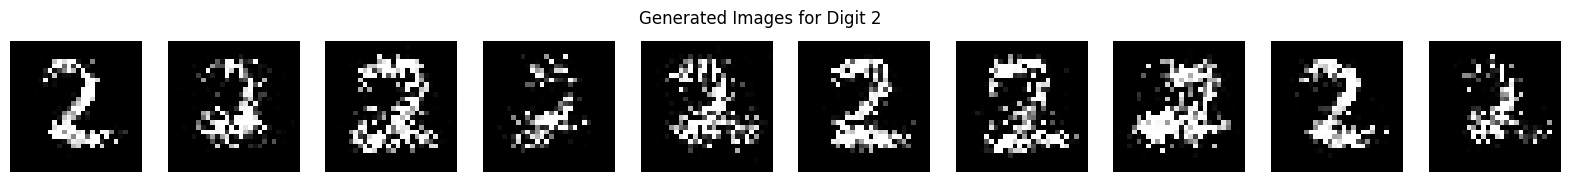

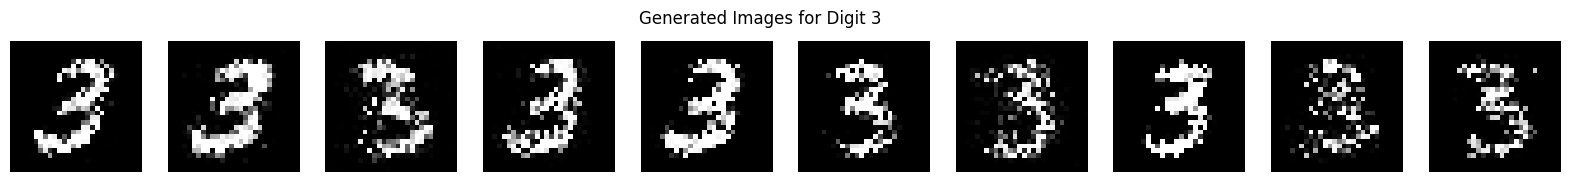

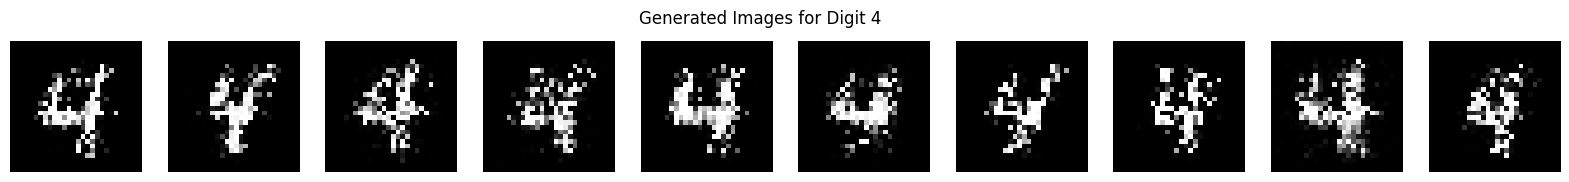

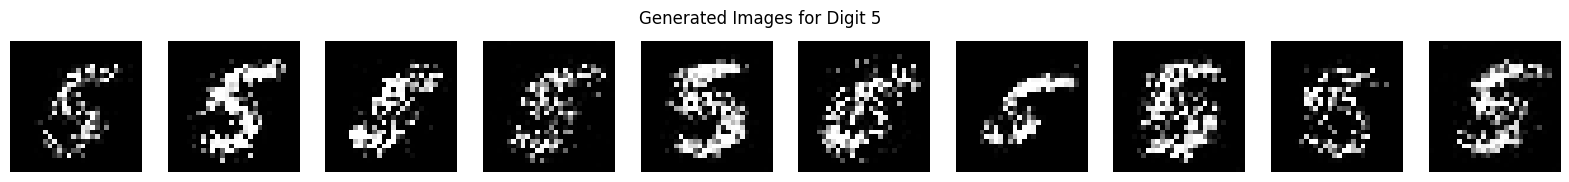

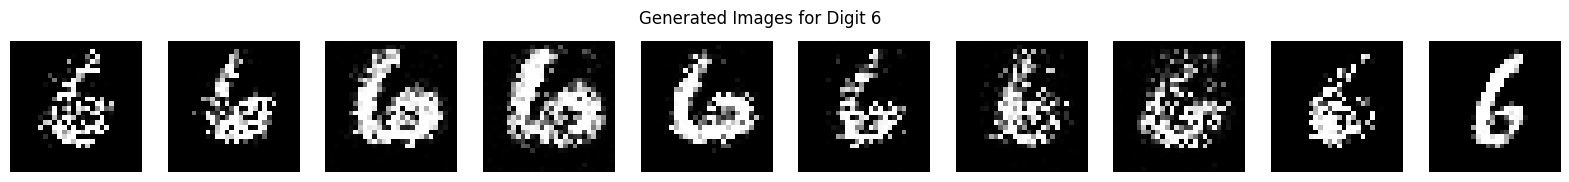

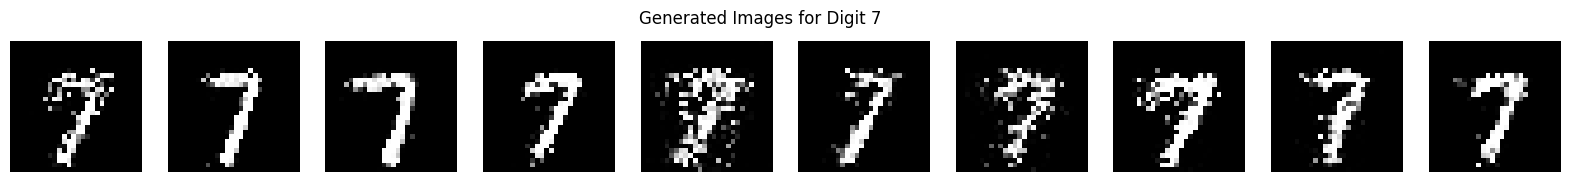

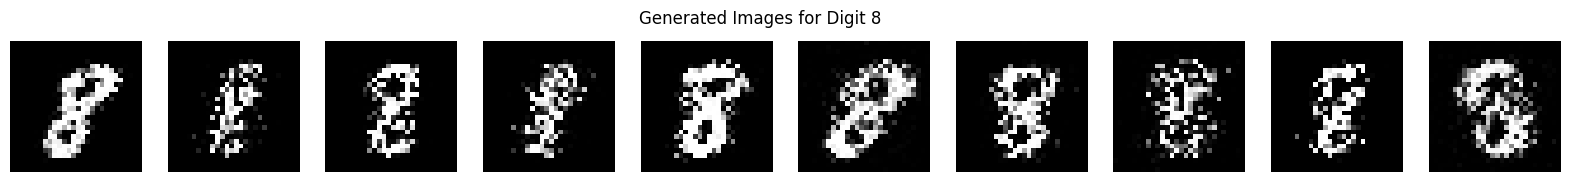

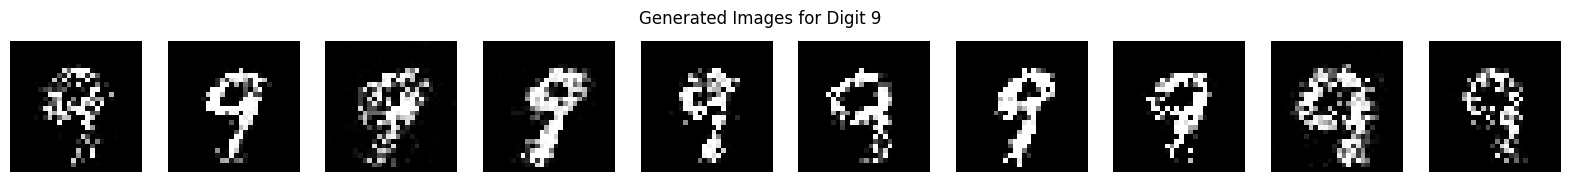

In [18]:
# Generate and display images for each digit
for i, model in enumerate(models):
    generate_images(model, digit=i)
    